# ASIMOV - Python para DS e ML - Pandas e Matplotlib

## Analisando Dados com Pandas - Conceitos Básicos

# Capítulo 2.1.1: O que o Pandas é Capaz

### Introdução aos Pandas

Neste curso, aprenderemos a usar pandas para análise de dados. Você deve enxergar o pandas como uma versão extremamente poderosa do Excel, com muito mais recursos. Nesta seção do curso, você deve passar pelos notebooks nesta ordem:

* Introdução aos Pandas
* Series
* DataFrames
* Dados ausentes
* GroupBy
* Mesclar,Juntar, e Concatenar
* Operações
* Entrada e saída de dados

In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd

In [255]:
caminho = (r"C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\_Cursos\ASIMOV - Python para DS e ML\2. Analisando Dados com Pandas\Apostilas_Pandas\Datasets")

In [7]:
df_data = pd.read_csv(caminho + "\supermarket_sales.csv")

In [8]:
df_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### 1. Qual o faturamento total por filial?

In [10]:
df_data.groupby("City")["Total", "gross income"].sum()

,Total,gross income
City,,
Mandalay,106197.6720,5057.0320
Naypyitaw,110568.7065,5265.1765
Yangon,106200.3705,5057.1605


### 2. Qual a percentual de participação na receita de cada tipo de produto?

In [20]:
(df_data.groupby("Product line")["Total"].sum() / df_data["Total"].sum()).sort_values() * 100

Product line
Health and beauty         15.231828
Home and lifestyle        16.677232
Fashion accessories       16.814702
Electronic accessories    16.824497
Sports and travel         17.067648
Food and beverages        17.384094
Name: Total, dtype: float64

### 3. Como está distribuído o tipo de produto consumido por gênero?

In [23]:
df_data.groupby(["Product line", "Gender"])[["Total"]].sum().pivot_table(index="Product line", columns="Gender")

Total            
Gender                      Female        Male
Product line                                  
Electronic accessories  27102.0225  27235.5090
Fashion accessories     30437.4000  23868.4950
Food and beverages      33170.9175  22973.9265
Health and beauty       18560.9865  30632.7525
Home and lifestyle      30036.8775  23825.0355
Sports and travel       28574.7210  26548.1055

### 4. Qual foi o faturamento por mês?

In [24]:
df_data["Date"] = pd.to_datetime(df_data["Date"])
df_data["Month"] = df_data["Date"].apply(lambda x: x.month)
df_data["Year"] = df_data["Date"].apply(lambda x: x.year)

In [25]:
df_data.groupby(["Month"])["Total"].sum()

Month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64

### 5. Qual foi a média de avaliação por cada filial em janeiro de 2019?

In [29]:
df_data[(df_data["Year"] == 2019) & (df_data["Month"] == 1)]["Rating"].mean()

7.017613636363638

### 6. Como se distribui o gasto por tipo de consumidor em cada filial?

In [31]:
df_data.groupby(["Customer type", "City"])[["Total"]].sum()

Total
Customer type City                 
Member        Mandalay   53704.6860
              Naypyitaw  56881.2825
              Yangon     53637.4755
Normal        Mandalay   52492.9860
              Naypyitaw  53687.4240
              Yangon     52562.8950

# Capítulo 2.1.4: Series

O primeiro tipo de dado que aprenderemos é a Serie. Vamos importar Pandas e explorar tal objeto.

A Serie é muito semelhante a uma matriz NumPy (na verdade, ela é construída em cima do objeto de matriz NumPy). O que diferencia a matriz NumPy de uma Série, é que uma Serie pode ter rótulos de eixos, o que significa que pode ser indexado por um rótulo, em vez de apenas uma localização numérica. Também não precisa manter dados numéricos, ele pode conter qualquer objeto Python arbitrário.

Vamos explorar este conceito através de alguns exemplos:

In [32]:
import numpy as np
import pandas as pd

### Criando uma Serie

Você pode converter uma lista, numpy array ou dicionário para uma série:

In [33]:
labels = ['a','b','c']
minha_lista = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

**Usando listas**

In [34]:
pd.Series(data=minha_lista)

0    10
1    20
2    30
dtype: int64

In [35]:
pd.Series(data=minha_lista,index=labels)

a    10
b    20
c    30
dtype: int64

In [36]:
pd.Series(minha_lista,labels)

a    10
b    20
c    30
dtype: int64

**NumPy Arrays**

In [37]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int32

**Dicionários**

In [38]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

### Dados nas Series

Uma série de pandas pode conter uma variedade de tipos de objeto:

In [39]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

In [40]:
# Mesmo funções (embora seja improvável que você use isso)
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

## Usando um Índice

A chave para usar uma Serie é entender seu índice. O Pandas faz uso desses nomes ou números de índice, permitindo pesquisas rápidas de informações (funciona como uma tabela de hash ou dicionário).

Vamos ver alguns exemplos de como pegar informações de uma Serie. Vamos criar duas Series, ser1 e ser2:

In [41]:
ser1 = pd.Series([1,2,3,4],index = ['EUA', 'Alemanha','USSR', 'Japão'])
ser1

EUA         1
Alemanha    2
USSR        3
Japão       4
dtype: int64

In [42]:
ser2 = pd.Series([1,2,5,4],index = ['EUA', 'Alemanha','Italia', 'Japão'])  
ser2

EUA         1
Alemanha    2
Italia      5
Japão       4
dtype: int64

In [43]:
ser1['EUA']

1

As operações também são feitas com base no índice:

In [44]:
ser1 + ser2

Alemanha    4.0
EUA         2.0
Italia      NaN
Japão       8.0
USSR        NaN
dtype: float64

# Capítulo 2.1.5: Dataframes e Manipulação de Colunas

DataFrame é o elemeto mais importante dos Pandas e são diretamente inspirados pela linguagem de programação R.<BR>
Podemos pensar em um DataFrame como um monte de objetos da série juntos para compartilhar o mesmo índice.<BR>
Vamos usar Pandas para explorar esse tópico!

In [45]:
import pandas as pd
import numpy as np

In [46]:
from numpy.random import randn
np.random.seed(101)

In [47]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


## Seleção e indexação

Vamos aprender os vários métodos para pegar dados de um DataFrame

In [48]:
# Como Série
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [49]:
# Como Dataframe
df[['W']]

,W
A,2.706850
B,0.651118
C,-2.018168
D,0.188695
E,0.190794


In [50]:
# Passando uma lista com nomes das colunas
df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [51]:
# Sintaxe SQL (Não recomendado!)
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

As colunas dos DataFrames são Series

In [52]:
type(df['W'])

pandas.core.series.Series

**Criando uma coluna:**

In [53]:
df['new'] = df['W'] + df['Y']
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


**Removendo colunas:**

In [54]:
df.drop('new',axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [55]:
# Porém, tal exclusão só ocorrerá se especificada no parâmetro inplace
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [56]:
df.drop('new',axis=1,inplace=True)
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


Também podemos deletar colunas desta forma:

In [57]:
df.drop('E',axis=0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


# Capítulo 2.1.6: Iloc e Filtros

**Selecionando linhas:**

In [60]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

Ou selecione com base na posição em vez do rótulo

In [62]:
df.iloc[0]

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [63]:
df.loc['B','Y']

-0.8480769834036315

In [64]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


# Capítulo 2.1.7: Operações com Índices

### Seleção condicional

Uma característica importante dos pandas é a seleção condicional usando notação de colchetes, muito semelhante ao numpy:

In [65]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [66]:
df>0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [67]:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [68]:
df[df['W']>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [69]:
df[df['W']>0]['Y']

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [70]:
df[df['W']>0][['Y','X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


Para duas condições, você pode usar | e & com parênteses:

In [71]:
df[(df['W']>0) & (df['Y'] > 1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


In [72]:
condicao_1 = df['W'] > 0
condicao_2 = df['Y'] > 1

df[(condicao_1) & (condicao_2)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


In [73]:
df[(condicao_1) | (condicao_2)]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


## Mais Detalhes do Índice

Vamos discutir mais alguns recursos de indexação, incluindo resetar o índice ou configurá-lo de outra forma. Também falaremos sobre hierarquia de índice!

In [74]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [75]:
# Redefinir para o padrão 0,1 ... n índice
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [79]:
novoind = 'CA NY WY OR CO'.split()
novoind

['CA', 'NY', 'WY', 'OR', 'CO']

In [80]:
df['Estados'] = novoind

In [81]:
df

,W,X,Y,Z,Estados
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [82]:
df.set_index('Estados')

,W,X,Y,Z
Estados,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [83]:
df

,W,X,Y,Z,Estados
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [84]:
df.set_index('Estados',inplace=True)

In [85]:
df

,W,X,Y,Z
Estados,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


# Capítulo 2.1.8: Índices Multiníveis

## Hierarquia de índices e índices múltiplos

Vamos examinar como trabalhar com o Multi-Index, primeiro criaremos um exemplo rápido de como seria um DataFrame Multi-Indexado:

In [86]:
# Níveis de Índice
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [87]:
hier_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [88]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

A         B
G1 1  0.302665  1.693723
   2 -1.706086 -1.159119
   3 -0.134841  0.390528
G2 1  0.166905  0.184502
   2  0.807706  0.072960
   3  0.638787  0.329646

Agora vamos mostrar como indexar isso! Para a hierarquia de índice, usamos df.loc []. Se este fosse no eixo das colunas, você usaria a notação de suporte normal df []. Chamar um nível do índice retorna um sub-dataframe:

In [89]:
df.loc['G1']

,A,B
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528


In [91]:
df.loc['G1'].loc[[1]]

,A,B
1,0.302665,1.693723


In [92]:
df.index.names

FrozenList([None, None])

In [93]:
df.index.names = ['Grupo','Número']

In [94]:
df

A         B
Grupo Número                    
G1    1       0.302665  1.693723
      2      -1.706086 -1.159119
      3      -0.134841  0.390528
G2    1       0.166905  0.184502
      2       0.807706  0.072960
      3       0.638787  0.329646

In [95]:
df.xs('G1')

,A,B
Número,,
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528


In [96]:
df.xs(['G1',1])

A    0.302665
B    1.693723
Name: (G1, 1), dtype: float64

In [97]:
df.xs(1,level='Número')

,A,B
Grupo,,
G1,0.302665,1.693723
G2,0.166905,0.184502


# Capítulo 2.1.9: Tratamento de dados ausentes

Vamos mostrar alguns métodos convenientes para lidar com Missing Data em pandas:

In [98]:
import numpy as np
import pandas as pd

In [99]:
df = pd.DataFrame({'A': [1,2,np.nan],
                  'B': [5,np.nan,np.nan],
                  'C': [1,2,3]})

In [100]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [101]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [102]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [103]:
# thresh=2: Exclui a linha que tem 2 valores NA
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [106]:
df.fillna(value='Valor Ausente')

,A,B,C
0,1.0,5.0,1
1,2.0,Valor Ausente,2
2,Valor Ausente,Valor Ausente,3


In [107]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [108]:
# Preenche os valores NA com a última observação que havia logo acima
df.ffill()

,A,B,C
0,1.0,5.0,1
1,2.0,5.0,2
2,2.0,5.0,3


In [110]:
df = pd.DataFrame({'A': [1,np.nan,88,1,np.nan,66],
                  'B': [5,np.nan,77,1,np.nan,58],
                  'C': [12,np.nan,2,1,np.nan,13]})

df

,A,B,C
0,1.0,5.0,12.0
1,NaN,NaN,NaN
2,88.0,77.0,2.0
3,1.0,1.0,1.0
4,NaN,NaN,NaN
5,66.0,58.0,13.0


In [111]:
# Preenche os valores NA com a última observação que havia abaixo
df.bfill() # bf: back fill

,A,B,C
0,1.0,5.0,12.0
1,88.0,77.0,2.0
2,88.0,77.0,2.0
3,1.0,1.0,1.0
4,66.0,58.0,13.0
5,66.0,58.0,13.0


# Capítulo 2.1.10: Groupby

O método groupby permite agrupar linhas de dados em conjunto e chamar funções agregadas

In [112]:
import pandas as pd

In [132]:
# Cria um DataFrame
data = {'Classe':['Júnior','Júnior','Pleno','Pleno','Sênior','Sênior','Pleno','Pleno'],
       'Nome':['Jorge','Carlos','Roberta','Patrícia','Bruno','Vera','Roberta','Patrícia'],
       'Venda':[200,120,340,124,243,350,550,367]}

In [133]:
df = pd.DataFrame(data)
df

,Classe,Nome,Venda
0,Júnior,Jorge,200
1,Júnior,Carlos,120
2,Pleno,Roberta,340
3,Pleno,Patrícia,124
4,Sênior,Bruno,243
5,Sênior,Vera,350
6,Pleno,Roberta,550
7,Pleno,Patrícia,367


**Agora, você pode usar o método .group by () para agrupar as linhas em conjunto com base em um nome de coluna. Por exemplo, vamos agrupar com base na empresa. Isso criará um objeto DataFrameGroupBy:**

In [134]:
df.groupby('Classe')

In [136]:
df.groupby(['Classe', 'Nome']).sum()

Venda
Classe Nome           
Júnior Carlos      120
       Jorge       200
Pleno  Patrícia    491
       Roberta     890
Sênior Bruno       243
       Vera        350

Você pode salvar este objeto como uma nova variável:

In [137]:
por_companhia = df.groupby("Classe")

E, em seguida, chamar métodos agregados do objeto:

In [138]:
por_companhia.mean()

,Venda
Classe,
Júnior,160.00
Pleno,345.25
Sênior,296.50


In [139]:
df.groupby('Classe').mean()

,Venda
Classe,
Júnior,160.00
Pleno,345.25
Sênior,296.50


Mais exemplos de métodos agregados:

In [140]:
por_companhia.std()

,Venda
Classe,
Júnior,56.568542
Pleno,174.522921
Sênior,75.660426


In [141]:
por_companhia.min()

,Nome,Venda
Classe,,
Júnior,Carlos,120
Pleno,Patrícia,124
Sênior,Bruno,243


In [142]:
por_companhia.max()

,Nome,Venda
Classe,,
Júnior,Jorge,200
Pleno,Roberta,550
Sênior,Vera,350


In [143]:
por_companhia.count()

,Nome,Venda
Classe,,
Júnior,2,2
Pleno,4,4
Sênior,2,2


In [144]:
por_companhia.describe()

Venda                                                         
       count    mean         std    min     25%    50%     75%    max
Classe                                                               
Júnior   2.0  160.00   56.568542  120.0  140.00  160.0  180.00  200.0
Pleno    4.0  345.25  174.522921  124.0  286.00  353.5  412.75  550.0
Sênior   2.0  296.50   75.660426  243.0  269.75  296.5  323.25  350.0

In [145]:
por_companhia.describe().transpose()

Classe           Júnior       Pleno      Sênior
Venda count    2.000000    4.000000    2.000000
      mean   160.000000  345.250000  296.500000
      std     56.568542  174.522921   75.660426
      min    120.000000  124.000000  243.000000
      25%    140.000000  286.000000  269.750000
      50%    160.000000  353.500000  296.500000
      75%    180.000000  412.750000  323.250000
      max    200.000000  550.000000  350.000000

# Capítulo 2.1.11: Merge, Concat e Join

Existem três maneiras principais de combinar os DataFrames: mesclando, juntando e concatenando (merge, join e concat). Nesta palestra, discutiremos esses 3 métodos com exemplos.

### Exemplos de DataFrames

In [146]:
import pandas as pd

In [153]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [154]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7])
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [155]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


## Concatenação

Concatenação basicamente cola DataFrames. Tenha em mente que as dimensões devem corresponder ao longo do eixo que você está concatenando. Você pode usar **pd.concat** e passar uma lista de DataFrames para concatenar juntos:

In [156]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [157]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


## Outros DataFrames

In [158]:
esquerda = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
direita = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})  

In [159]:
esquerda

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [160]:
direita

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


## Mesclar

A função **mesclar** permite que você mescle os quadros de dados juntos usando uma lógica semelhante à mesclagem de tabelas SQL juntas. Por exemplo:

In [161]:
pd.merge(esquerda,direita,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


Ou para mostrar um exemplo mais complicado:

In [162]:
esquerda = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
direita = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [163]:
pd.merge(esquerda, direita, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [164]:
pd.merge(esquerda, direita, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [165]:
pd.merge(esquerda, direita, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [166]:
pd.merge(esquerda, direita, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


## Juntar
Juntar é um método conveniente para combinar as colunas de dois DataFrames indexados potencialmente diferentes em um único resultado DataFrame.

In [167]:
esquerda = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

direita = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [168]:
esquerda

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [169]:
direita

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [170]:
esquerda.join(direita)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [171]:
esquerda.join(direita, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


# Capítulo 2.1.12: Operações com DataFrames

Há muitas operações com pandas que serão realmente úteis para você, mas não se enquadram em nenhuma categoria distinta. Vamos mostrar aqui nesta aula:

In [172]:
import pandas as pd

In [185]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})

In [180]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    4 non-null      int64 
 1   col2    4 non-null      int64 
 2   col3    4 non-null      object
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [176]:
df.memory_usage()

Index    128
col1      32
col2      32
col3      32
dtype: int64

### Informação sobre valores exclusivos

In [177]:
# Ocorrencias Únicas
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [178]:
# Quantidade de Ocorrencias Únicos
df['col2'].nunique()

3

In [179]:
# Quantas vezes cada ocorrencia aparece
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### Selecionando dados

In [181]:
# Selecione do DataFrame usando critérios de várias colunas
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [182]:
newdf

,col1,col2,col3
3,4,444,xyz


### Aplicando funções

In [186]:
def times2(x):
    return x * 2

In [187]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [189]:
df["col1_calc"] = df['col1'].apply(times2)
df

,col1,col2,col3,col1_calc
0,1,444,abc,2
1,2,555,def,4
2,3,666,ghi,6
3,4,444,xyz,8


In [194]:
df["col1"].apply(lambda x: x * 2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [195]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [196]:
df['col1']

0    1
1    2
2    3
3    4
Name: col1, dtype: int64

In [197]:
df['col1'].sum()

10

In [198]:
df['col1'].count()

4

In [199]:
df['col1'].product()

24

In [200]:
df['col1'].mean()

2.5

In [201]:
df['col1'].max()

4

In [202]:
df['col1'].min()

1

In [203]:
df['col1'].idxmax()

3

In [204]:
df['col1'].idxmin()

0

In [205]:
df['col1'].add(1)

0    2
1    3
2    4
3    5
Name: col1, dtype: int64

In [206]:
df['col1'].sub(1)

0    0
1    1
2    2
3    3
Name: col1, dtype: int64

In [207]:
df['col1'].mul(2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [208]:
df['col1'].div(2)

0    0.5
1    1.0
2    1.5
3    2.0
Name: col1, dtype: float64

**Removendo colunas permanentemente**

In [209]:
del df['col1']

In [210]:
df

,col2,col3,col1_calc
0,444,abc,2
1,555,def,4
2,666,ghi,6
3,444,xyz,8


**Obter nomes de coluna e índice:**

In [211]:
df.columns

Index(['col2', 'col3', 'col1_calc'], dtype='object')

In [212]:
df.index

RangeIndex(start=0, stop=4, step=1)

**Ordenando um DataFrame**

In [213]:
df

,col2,col3,col1_calc
0,444,abc,2
1,555,def,4
2,666,ghi,6
3,444,xyz,8


In [214]:
df.sort_values(by='col2') #inplace=False por padrão

,col2,col3,col1_calc
0,444,abc,2
3,444,xyz,8
1,555,def,4
2,666,ghi,6


**Encontre Valores Nulos ou Verifique Valores Nulos**

In [215]:
df.isnull()

,col2,col3,col1_calc
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


In [216]:
# Deleta linhas com valores NaN
df.dropna()

,col2,col3,col1_calc
0,444,abc,2
1,555,def,4
2,666,ghi,6
3,444,xyz,8


**Preenchendo os valores de NaN com outra coisa:**

In [217]:
import numpy as np

In [218]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[np.nan,555,666,444],
                   'col3':['abc','def','ghi','xyz']})

In [219]:
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [220]:
df.fillna('Preencher')

,col1,col2,col3
0,1.0,Preencher,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,Preencher,444.0,xyz


In [221]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}

In [222]:
df = pd.DataFrame(data)

In [223]:
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [224]:
dicionario_map = {
    'foo': 'fu',
    'bar': 'bah',
}

In [225]:
df['A'].map(dicionario_map)

0     fu
1     fu
2     fu
3    bah
4    bah
5    bah
Name: A, dtype: object

In [227]:
df['E'] = df['A'].map(dicionario_map)
df

,A,B,C,D,E
0,foo,one,x,1,fu
1,foo,one,y,3,fu
2,foo,two,x,2,fu
3,bar,two,y,5,bah
4,bar,one,x,4,bah
5,bar,one,y,1,bah


In [228]:
condicao = df == 'one'

In [229]:
df.where(condicao, 0)

,A,B,C,D,E
0,0,one,0,0,0
1,0,one,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,one,0,0,0
5,0,one,0,0,0


In [230]:
df.pivot_table(values='D',index=['A', 'B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

# Capítulo 2.1.13: Séries Temporais no Pandas

Muitas vezes trabalhando com Dataframes, os dados são orientados de forma temporal, é importante saber manipular esse tipo de dado.

In [231]:
import pandas as pd

In [232]:
numero_de_dias = 100
datas = pd.date_range(start='1/1/2021', periods=numero_de_dias)

In [233]:
datas

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [234]:
df = pd.DataFrame(range(numero_de_dias), columns=['number'], index=datas)
df.index.name = 'datas'

In [235]:
df

,number
datas,
2021-01-01,0
2021-01-02,1
2021-01-03,2
2021-01-04,3
2021-01-05,4
...,...
2021-04-06,95
2021-04-07,96
2021-04-08,97


In [236]:
df.index[0]

Timestamp('2021-01-01 00:00:00', freq='D')

In [237]:
ultima_data = df.index[-1]

In [238]:
ultima_data

Timestamp('2021-04-10 00:00:00', freq='D')

In [239]:
ultima_data.day

10

In [240]:
ultima_data.month

4

In [241]:
ultima_data.year

2021

In [242]:
ultima_data.hour

0

In [243]:
df[df.index.day == 1]

,number
datas,
2021-01-01,0
2021-02-01,31
2021-03-01,59
2021-04-01,90


### Visualização básica

<AxesSubplot:xlabel='datas'>

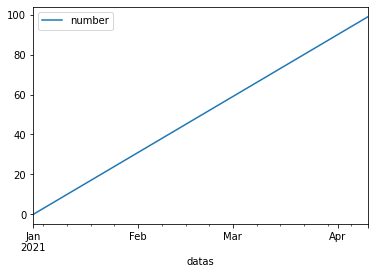

In [244]:
df.plot()

In [245]:
df2 = df.copy()
df2['number_2'] = df['number'] + 30

In [247]:
df2

,number,number_2
datas,,
2021-01-01,0,30
2021-01-02,1,31
2021-01-03,2,32
2021-01-04,3,33
2021-01-05,4,34
...,...,...
2021-04-06,95,125
2021-04-07,96,126
2021-04-08,97,127


<AxesSubplot:xlabel='datas'>

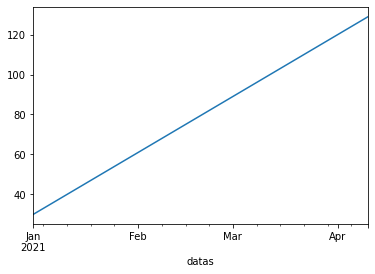

In [250]:
df2['number_2'].plot()

<AxesSubplot:xlabel='datas'>

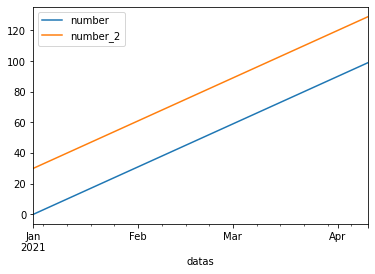

In [251]:
df2.plot()

<AxesSubplot:xlabel='datas'>

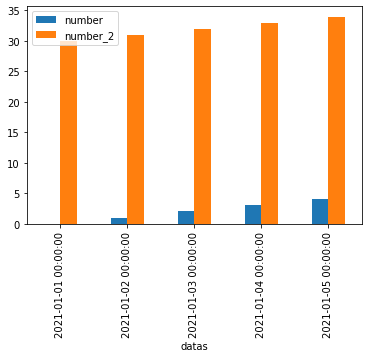

In [252]:
df2.iloc[:5].plot(kind='bar')

# Capítulo 2.1.14: Entrada e Saída de Dados

Este notebook conterá nossas referências sobre entrada e saída de dados. O pandas pode ler uma variedade de tipos de arquivos usando seus métodos pd.read_. Vejamos os tipos de dados mais comuns:

In [253]:
import pandas as pd
import numpy as np

## CSV

### CSV Input

In [257]:
df = pd.read_csv(caminho + '\exemplo.csv')
df

,0,1,2,3
0,-0.394813,-0.694630,0.253393,0.602590
1,-2.134217,1.141381,-0.130142,0.690936
2,-0.223754,0.365133,-0.104233,-0.182788
3,0.108066,0.331332,0.053708,-0.280468
4,0.085290,0.740834,-0.596941,0.243950


### Saída de dados tipo CSV 

In [258]:
df.to_csv(caminho + '\exemplo.csv',index=False)

## Excel

Pandas podem ler e escrever arquivos do Excel, tenha em mente, isso só importa dados. Não fórmulas nem imagens, lembrando que imagens ou macros podem bugar o método.

In [ ]:
#Bibliotecas necessárias para trabalhar com excel
!pip install xlrd
!pip install openpyxl

### Entrada via Excel

In [ ]:
pd.read_excel(caminho + '\Exemplo_Excel.xlsx',sheet_name='Sheet1')

### Saída via Excel

In [ ]:
df.to_excel(caminho + '\Exemplo_Excel.xlsx',sheet_name='Sheet1')

## HTML

### Entrada HTML

A função Pandas read_html irá ler tabelas fora de uma página da Web e retornar uma lista de objetos DataFrame:

In [ ]:
df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

In [ ]:
df[0]

# Capítulo 2.2.1: Projeto 1 - Análise dos preços da gasolina no Brasil

## Exercícios

Link para Dataset: https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil

In [260]:
import pandas as pd

## Neste projeto, trabalharemos com dois arquivos csvs separados, contendo informações sobre o preço da gasolina no Brasil. 

### 1. Carregue os conjuntos de dados "gasolina_2000+.csv" e "gasolina_2010+.csv" em dois DataFrames diferentes e combine-os em um único DataFrame.

In [261]:
caminho = (r"C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\_Cursos\ASIMOV - Python para DS e ML\2. Analisando Dados com Pandas\Apostilas_Pandas\Datasets")

In [262]:
df1 = pd.read_csv(caminho + "\gasolina_2000+.csv", index_col=0)
df2 = pd.read_csv(caminho + "\gasolina_2010+.csv", index_col=0)

In [263]:
df = pd.concat([df1, df2])

### 2.Investigue as colunas e entenda o conjunto de dados usando o head() e info()

In [264]:
df.head(5)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

### 3. Selecione a terceira entrada da coluna DATA INICIAL e verifique seu tipo.

In [266]:
type(df["DATA INICIAL"].iloc[2])

str

### 4. Você deve ter percebido que as colunas DATA INICIAL e DATA FINAL estão formatadas como string. Utilizando o método pd.to_datetime(), converta ambas colunas para Timestamp / Datetime.

In [267]:
df["DATA INICIAL"] = pd.to_datetime(df["DATA INICIAL"])
df["DATA FINAL"] = pd.to_datetime(df["DATA FINAL"])

In [273]:
type(df["DATA INICIAL"].iloc[2])

pandas._libs.tslibs.timestamps.Timestamp

### 5. Crie uma nova coluna para representar o mês e o ano (mm-aaaa), utilizando a coluna DATA FINAL como referência. 

In [274]:
df["ANO-MES"] = df["DATA FINAL"].apply(lambda x: "{}".format(x.year)) + df["DATA FINAL"].apply(lambda x: "-{:02d}".format(x.month))

In [276]:
df.head(3)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ANO-MES
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,2004-05
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,2004-05
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,2004-05


### 6. Utilizando o value_counts(), liste todos os tipos de produtos contidos na base de dados.

In [277]:
df["PRODUTO"].value_counts()

GASOLINA COMUM        23570
GLP                   23561
ETANOL HIDRATADO      23440
ÓLEO DIESEL           21194
GNV                   14469
ÓLEO DIESEL S10        9113
OLEO DIESEL S10        2376
OLEO DIESEL            2351
GASOLINA ADITIVADA      749
Name: PRODUTO, dtype: int64

### 7. Filtre o DataFrame para obter apenas dados da 'GASOLINA COMUM'. Grave em uma nova variável.

In [278]:
df2 = df[df["PRODUTO"] == 'GASOLINA COMUM']

In [279]:
df2.head(5)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ANO-MES
12064,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,GASOLINA COMUM,128,R$/l,2.029,0.007,1.99,2.070,0.318,0.003,1.711,0.02,1.651,1.7427,0.012,2004-05
12065,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,GASOLINA COMUM,395,R$/l,2.025,0.062,1.85,2.220,0.296,0.031,1.729,0.036,1.6643,1.915,0.021,2004-05
12066,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,GASOLINA COMUM,194,R$/l,2.358,0.066,2.00,2.540,0.472,0.028,1.886,0.068,1.75,2.0713,0.036,2004-05
12067,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,GASOLINA COMUM,166,R$/l,2.120,0.075,1.97,2.440,0.325,0.035,1.795,0.033,1.70701,1.9703,0.018,2004-05
12068,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,GASOLINA COMUM,106,R$/l,2.090,0.034,2.00,2.159,0.35,0.016,1.74,0.042,1.6789,1.918,0.024,2004-05


### 8. Qual o preço médio de revenda da gasolina em agosto de 2008?

In [280]:
df2[df2["ANO-MES"] == '2008-08']["PREÇO MÉDIO REVENDA"].mean()

2.6012444444444447

### 9. Qual o preço médio de revenda da gasolina em maio de 2014 em São Paulo?

In [281]:
df2[(df2["ANO-MES"] == '2008-08') & (df2["ESTADO"] == 'SAO PAULO')]["PREÇO MÉDIO REVENDA"].mean()

2.4046

### 10. Você conseguiria descobrir em qual(quais) estado(s) a gasolina ultrapassou a barreira dos R$ 5,00? E quando isso ocorreu?

In [282]:
df2[df2["PREÇO MÉDIO REVENDA"] > 5][["ESTADO", "ANO-MES", "PREÇO MÉDIO REVENDA"]].head(5)

,ESTADO,ANO-MES,PREÇO MÉDIO REVENDA
98201,ACRE,2018-05,5.053
98347,ACRE,2018-06,5.035
98493,ACRE,2018-06,5.038
98511,RIO DE JANEIRO,2018-06,5.016
98646,ACRE,2018-06,5.031


### 11. Qual a média de preço dos estados da região sul em 2012?

In [287]:
df_aux = df2[(df2["DATA FINAL"].apply(lambda x: x.year) == 2012)]
df_aux[df_aux["REGIÃO"] == "SUL"]["PREÇO MÉDIO REVENDA"].mean()

2.7214423076923073

### 12. Você conseguiria obter uma tabela contendo a variação percentual ano a ano para o estado do Rio de Janeiro?

In [289]:
df2["MES"] = df2["DATA FINAL"].apply(lambda x: x.month)

In [290]:
df_rio = df2[df2["ESTADO"] == "RIO DE JANEIRO"]

In [291]:
df_month_rio = df_rio.groupby("ANO-MES")[["PREÇO MÉDIO REVENDA", "MES"]].last()

In [292]:
(df_month_rio[df_month_rio["MES"] == 12] / df_month_rio[df_month_rio["MES"] == 12].shift(1) - 1) * 100

,PREÇO MÉDIO REVENDA,MES
ANO-MES,,
2004-12,NaN,NaN
2005-12,9.233449,0.0
2006-12,0.917065,0.0
2007-12,0.355591,0.0
2008-12,0.984252,0.0
2009-12,1.637427,0.0
2010-12,2.032988,0.0
2011-12,7.105263,0.0
2012-12,0.982801,0.0


### DESAFIO: Crie uma tabela contendo uma serie temporal com a diferença absoluta e percentual entre os valores mais baratos e caros. Apresente também ao lado os estados na qual os maiores e menores preços foram registrados.

In [293]:
df_max = df2.groupby("ANO-MES").max()["PREÇO MÉDIO REVENDA"].sort_index()
idx_max = df2.groupby('ANO-MES')["PREÇO MÉDIO REVENDA"].idxmin()

df_min = df2.groupby("ANO-MES").min()["PREÇO MÉDIO REVENDA"].sort_index()
idx_min = df2.groupby('ANO-MES')["PREÇO MÉDIO REVENDA"].idxmax()
df_diff = pd.DataFrame()

In [294]:
idx_max

ANO-MES
2004-05     12114
2004-06     12168
2004-07     12334
2004-08     12411
2004-09     12600
            ...  
2021-01    117685
2021-02    118739
2021-03    119271
2021-04    120344
2021-05    120701
Name: PREÇO MÉDIO REVENDA, Length: 204, dtype: int64

In [295]:
df_diff["abs_diff"] = df_max - df_min
df_diff["perct_diff"] = (df_max - df_min) / df_min * 100
df_diff["max"] = df_max
df_diff["min"] = df_min

In [296]:
df2.loc[idx_max, :][["ESTADO", "PREÇO MÉDIO REVENDA", "ANO-MES"]]

,ESTADO,PREÇO MÉDIO REVENDA,ANO-MES
12114,SAO PAULO,1.888,2004-05
12168,SAO PAULO,1.912,2004-06
12334,DISTRITO FEDERAL,1.936,2004-07
12411,SAO PAULO,2.030,2004-08
12600,SAO PAULO,2.031,2004-09
...,...,...,...
117685,AMAPA,3.830,2021-01
118739,AMAPA,4.121,2021-02
119271,AMAPA,4.579,2021-03
120344,AMAPA,4.777,2021-04


In [297]:
df_diff["ESTADO_MAX"] = df2.loc[idx_max, :]["ESTADO"].values
df_diff["ESTADO_MIN"] = df2.loc[idx_min, :]["ESTADO"].values

In [298]:
df_diff["ESTADO_MAX"].value_counts()

SAO PAULO              40
AMAPA                  38
PIAUI                  28
PARAIBA                28
PARANA                 14
AMAZONAS               14
DISTRITO FEDERAL       12
MARANHAO                9
SANTA CATARINA          6
PERNAMBUCO              4
MATO GROSSO DO SUL      3
RIO GRANDE DO NORTE     2
GOIAS                   2
CEARA                   2
BAHIA                   2
Name: ESTADO_MAX, dtype: int64

In [299]:
df_diff["ESTADO_MIN"].value_counts()

ACRE              166
MATO GROSSO        25
RIO DE JANEIRO     11
RORAIMA             2
Name: ESTADO_MIN, dtype: int64

# Capítulo 2.3.2: Funções Adicionais

In [303]:
import pandas as pd
import numpy as np

In [304]:
caminho = (r"C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\_Cursos\ASIMOV - Python para DS e ML\2. Analisando Dados com Pandas\Apostilas_Pandas\Datasets")

In [306]:
df_obesity = pd.read_csv(caminho + "\obesity_cleaned.csv")

### to_frame() ou [ ]

In [307]:
type(df_obesity["Year"])

pandas.core.series.Series

In [308]:
df_obesity["Year"].to_frame()

,Year
0,1975
1,1975
2,1975
3,1976
4,1976
...,...
24565,2015
24566,2015
24567,2016
24568,2016


In [309]:
type(df_obesity["Year"].to_frame())

pandas.core.frame.DataFrame

In [310]:
type(df_obesity[["Year"]])

pandas.core.frame.DataFrame

### transpose()

In [311]:
df_obesity[["Year"]]

,Year
0,1975
1,1975
2,1975
3,1976
4,1976
...,...
24565,2015
24566,2015
24567,2016
24568,2016


In [312]:
df_obesity[["Year"]].transpose()

,0,1,2,3,4,5,6,7,8,9,...,24560,24561,24562,24563,24564,24565,24566,24567,24568,24569
Year,1975,1975,1975,1976,1976,1976,1977,1977,1977,1978,...,2013,2014,2014,2014,2015,2015,2015,2016,2016,2016


### shift()

In [313]:
df_obesity["Year"]

0        1975
1        1975
2        1975
3        1976
4        1976
         ... 
24565    2015
24566    2015
24567    2016
24568    2016
24569    2016
Name: Year, Length: 24570, dtype: int64

In [314]:
# shift(1): Desloca as informações 1 casa em relação ao index (muito utilizado em cotações)
df_obesity["Year"].shift(1)

0           NaN
1        1975.0
2        1975.0
3        1975.0
4        1976.0
          ...  
24565    2015.0
24566    2015.0
24567    2015.0
24568    2016.0
24569    2016.0
Name: Year, Length: 24570, dtype: float64

### isin()

In [316]:
df_obesity["Year"].isin([1900, 1975])

0        False
1        False
2        False
3        False
4        False
         ...  
24565    False
24566    False
24567    False
24568    False
24569    False
Name: Year, Length: 24570, dtype: bool

### values

In [317]:
df_obesity["Year"].values

array([1975, 1975, 1975, ..., 2016, 2016, 2016], dtype=int64)

In [318]:
df_obesity.values

array([[0, 'Afghanistan', 1975, '0.5 [0.2-1.1]', 'Both sexes'],
       [1, 'Afghanistan', 1975, '0.2 [0.0-0.6]', 'Male'],
       [2, 'Afghanistan', 1975, '0.8 [0.2-2.0]', 'Female'],
       ...,
       [24567, 'Zimbabwe', 2016, '15.5 [12.0-19.2]', 'Both sexes'],
       [24568, 'Zimbabwe', 2016, '4.7 [2.5-8.0]', 'Male'],
       [24569, 'Zimbabwe', 2016, '25.3 [19.1-32.0]', 'Female']],
      dtype=object)

### to_dict()

In [322]:
df_obesity.set_index("Year").to_dict()

{'Unnamed: 0': {1975: 24446,
  1976: 24449,
  1977: 24452,
  1978: 24455,
  1979: 24458,
  1980: 24461,
  1981: 24464,
  1982: 24467,
  1983: 24470,
  1984: 24473,
  1985: 24476,
  1986: 24479,
  1987: 24482,
  1988: 24485,
  1989: 24488,
  1990: 24491,
  1991: 24494,
  1992: 24497,
  1993: 24500,
  1994: 24503,
  1995: 24506,
  1996: 24509,
  1997: 24512,
  1998: 24515,
  1999: 24518,
  2000: 24521,
  2001: 24524,
  2002: 24527,
  2003: 24530,
  2004: 24533,
  2005: 24536,
  2006: 24539,
  2007: 24542,
  2008: 24545,
  2009: 24548,
  2010: 24551,
  2011: 24554,
  2012: 24557,
  2013: 24560,
  2014: 24563,
  2015: 24566,
  2016: 24569},
 'Country': {1975: 'Zimbabwe',
  1976: 'Zimbabwe',
  1977: 'Zimbabwe',
  1978: 'Zimbabwe',
  1979: 'Zimbabwe',
  1980: 'Zimbabwe',
  1981: 'Zimbabwe',
  1982: 'Zimbabwe',
  1983: 'Zimbabwe',
  1984: 'Zimbabwe',
  1985: 'Zimbabwe',
  1986: 'Zimbabwe',
  1987: 'Zimbabwe',
  1988: 'Zimbabwe',
  1989: 'Zimbabwe',
  1990: 'Zimbabwe',
  1991: 'Zimbabwe',
  19

### isna()

In [320]:
df_obesity["Sex"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
24565    False
24566    False
24567    False
24568    False
24569    False
Name: Sex, Length: 24570, dtype: bool

# Capítulo 2.3.3: Projeto 2 - Análise de dados de obesidade Mundial

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [324]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [323]:
df_obesity = pd.read_csv(caminho + "/obesity_cleaned.csv")

In [325]:
df_obesity.head(5)

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


In [326]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB


- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [328]:
# Deletando coluna: Unnamed: 0
del df_obesity["Unnamed: 0"]

# Split de dados da coluna Obesity (%) - Após split selecionando primeira ocorrencia [0]
df_obesity["Obesity"] = df_obesity["Obesity (%)"].apply(lambda x: x.split(" ")[0])

In [338]:
# Observa-se ocorrencia de valor "No" entre as entradas
df_obesity["Obesity"].value_counts()

No      504
0.4     222
0.6     218
0.5     217
0.7     210
       ... 
60.1      1
56.3      1
59.8      1
55.5      1
46.5      1
Name: Obesity, Length: 602, dtype: int64

In [340]:
# Substituindo valor "No" por np.nan
# df_obesity.loc[LINHA, COLUNA]

df_obesity.loc[df_obesity["Obesity"] == "No", "Obesity"] = np.nan

In [341]:
# Removendo com dropna os valores np.nan
df_obesity.dropna(inplace=True)

In [342]:
# Convertendo valores para float
df_obesity["Obesity"] = df_obesity["Obesity"].apply(lambda x: float(x))
# df_obesity["Obesity"] = df_obesity["Obesity"].astype(float)

df_obesity["Year"] = df_obesity["Year"].apply(lambda x: float(x))

In [343]:
# Setando Ano como index do df
df_obesity.set_index("Year", inplace=True)

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [344]:
df_obesity[df_obesity.index == 2015].groupby("Sex").mean()

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [345]:
# Filtrando o df pelo maior e menor ano
df_obesity_start = df_obesity[df_obesity.index == 1975]
df_obesity_end = df_obesity[df_obesity.index == 2016]

# Setando Pais como index
df_obesity_start.set_index("Country", inplace=True)
df_obesity_end.set_index("Country", inplace=True)

In [346]:
# Subtraindo taxa de obesidade final menos inicial dos dfs
df_obesity_ev = df_obesity_end[df_obesity_end["Sex"] == "Both sexes"]["Obesity"] - df_obesity_start[df_obesity_start["Sex"] == "Both sexes"]["Obesity"]

In [347]:
# Removendo dropna de paises sem a informação
# Aqui temos os 5 países com menor obesidade
df_obesity_ev.sort_values().dropna().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [348]:
# Removendo dropna de paises sem a informação
# Aqui temos os 5 países com maior obesidade
df_obesity_ev.sort_values().dropna().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [349]:
df_2015 = df_obesity[df_obesity.index == 2015].copy()
df_2015[df_2015["Obesity"] == df_2015["Obesity"].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015.0,Nauru,63.1 [55.5-70.3],Female,63.1


In [350]:
df_2015 = df_obesity[df_obesity.index == 2015].copy()
df_2015[df_2015["Obesity"] == df_2015["Obesity"].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015.0,Viet Nam,1.5 [0.8-2.5],Male,1.5


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [352]:
df_brasil = df_obesity[df_obesity["Country"] == "Brazil"]

<AxesSubplot:xlabel='Year'>

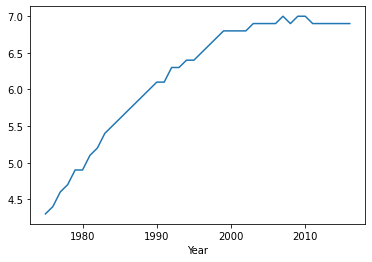

In [353]:
(df_brasil[df_brasil["Sex"] == "Female"]["Obesity"] - df_brasil[df_brasil["Sex"] == "Male"]["Obesity"]).plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [354]:
all_countries = df_obesity["Country"].value_counts()
df_both = df_obesity[df_obesity["Sex"] == "Both sexes"]
df_both = df_both.groupby("Year")["Obesity"].mean()

<AxesSubplot:xlabel='Year'>

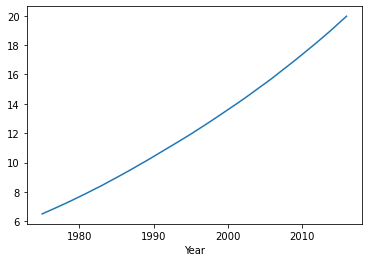

In [355]:
df_both.plot()

## Perguntas - GDP Per Person (1901-2011)

In [356]:
df_gdp = pd.read_csv(caminho + "/GDP.csv", decimal=".")

# gdp = Renda per capita

In [358]:
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


In [357]:
df_gdp.columns

# Observe que a coluna ' GDP_pp ' possui espaços antes e depois

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')

- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [359]:
# Selecionando apenas o ano da coluna Year e convertendo para inteiro
df_gdp["Year"] = df_gdp["Year"].apply(lambda x: int(x.split("/")[-1]))

In [360]:
# Aplicando split para remover espaços
# Substituindo a vírgula da numeração de milhar por nada, após transforma o número em float
df_gdp["gdp_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split(" ")[1].replace(",", "")))

In [361]:
# Deletando a coluna não tratada
del df_gdp[" GDP_pp "]

In [362]:
df_gdp.head(3)

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25


- Você conseguiria informar o primeiro valor registrado de cada país?

In [363]:
df_gdp.groupby("Country").min()["Year"]

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

In [364]:
df_gdp.groupby("Country").min()["Year"].isna().sum()

0

In [365]:
df_gdp.groupby("Country").min()["Year"].value_counts()

1901    192
1991      1
Name: Year, dtype: int64

In [366]:
df_gdp.groupby("Country").min()["Year"][df_gdp.groupby("Country").min()["Year"] == 1991]

Country
Kosovo    1991
Name: Year, dtype: int64

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [367]:
# Descobrindo o valor máximo da ocorrência
df_gdp[df_gdp["Year"] < 2000]["Year"].max()

1996

In [368]:
df_gdp_start = df_gdp[(df_gdp["Year"] == 1901)]
df_gdp_end = df_gdp[(df_gdp["Year"] == 1996)]

In [369]:
# Groupby por região com df de ano final dividido pelo df de ano inicial
((df_gdp_end.groupby("Region")["gdp_pp"].mean() / df_gdp_start.groupby("Region")["gdp_pp"].mean() - 1) * 100).sort_values(ascending=False)

Region
Middle East, North Africa, and Greater Arabia    857.215950
Asia                                             711.761516
Europe                                           594.046167
North America                                    589.760175
Central America and the Caribbean                406.426789
Australia and Oceania                            396.075383
South America                                    312.123735
Sub-Saharan Africa                               248.633780
Name: gdp_pp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [370]:
df_gdp.head()

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40


In [371]:
# Criando array de todos os anos
arr_years = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max())
arr_years

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [373]:
# transformando o array em df
df_all_years = pd.DataFrame(arr_years, columns=["Year"])
df_all_years

,Year
0,1901
1,1902
2,1903
3,1904
4,1905
...,...
105,2006
106,2007
107,2008
108,2009


In [375]:
# Definindo a coluna Years como index
df_all_years.index = df_all_years["Year"]
df_all_years

,Year
Year,
1901,1901
1902,1902
1903,1903
1904,1904
1905,1905
...,...
2006,2006
2007,2007
2008,2008


In [376]:
# Definindo anos não presentes no dataset original
df_years_off = ~df_all_years["Year"].isin(df_gdp["Year"])
df_years_off

# O til (~) inverte o resultado, todos os resultados que eram true passam a ser false

Year
1901    False
1902     True
1903     True
1904     True
1905     True
        ...  
2006    False
2007     True
2008     True
2009     True
2010     True
Name: Year, Length: 110, dtype: bool

In [378]:
# Definindo os anos que precisa adicionar
df_years_off = df_all_years.loc[df_years_off].index
df_years_off

Int64Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914,
            1915, 1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928,
            1929, 1930, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942,
            1943, 1944, 1945, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955,
            1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969,
            1970, 1972, 1973, 1974, 1975, 1977, 1978, 1979, 1980, 1982, 1983,
            1984, 1985, 1987, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1997,
            1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010],
           dtype='int64', name='Year')

In [379]:
# Ordenando por ano e por pais
df_gdp = df_gdp.sort_values(["Country", "Year"])

In [381]:
# Deslocando a taxa e os anos e vendo alteração de valores no intervalo (shift(1))
df_gdp["delta_gdp"] = df_gdp["gdp_pp"] - df_gdp["gdp_pp"].shift(1)
df_gdp["delta_year"] = df_gdp["Year"] - df_gdp["Year"].shift(1)
df_gdp

,Country,Region,Year,gdp_pp,delta_gdp,delta_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0
...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0


In [383]:
# Taxa GBP por ano
# Retornando o valor para cima (shift(-1))
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1)
df_gdp

,Country,Region,Year,gdp_pp,delta_gdp,delta_year,gdp_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN,2.010
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0,2.042
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0,2.606
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0,3.024
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0,3.094
...,...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0,-0.118
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0,-12.308
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0,-39.958
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0,1.232


In [384]:
# Criando uma coluna na mesma linha com a informação do próximo ano a ser iterado
df_gdp["next_year"] = df_gdp["Year"].shift(-1)
df_gdp

,Country,Region,Year,gdp_pp,delta_gdp,delta_year,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0,3.094,1926.0
...,...,...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0,-0.118,1996.0
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0,-12.308,2001.0
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0,-39.958,2006.0
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0,1.232,2011.0


In [385]:
# Deletando colunas desnecessárias
del df_gdp["delta_gdp"], df_gdp["delta_year"]

In [386]:
df_gdp.head(5)

,Country,Region,Year,gdp_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0


In [388]:
# Criando novo df
df_new_data = pd.DataFrame()

In [389]:
for idx, row in df_gdp.iterrows():
    if row["Year"] == 2011:
        continue
    
    # print(idx, row)
    year_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off >row["Year"])]
    
    for new_year in year_to_add:
        add_row = row.copy()
        add_row["gdp_pp"] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row["gdp_pp"]
        add_row["Year"] = new_year
        df_new_data["kind"] = "estimated"
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [390]:
df_gdp.iloc[100:].head(10)

,Country,Region,Year,gdp_pp,gdp_year,next_year
100,Angola,Sub-Saharan Africa,1941,2170.80,119.530,1946.0
101,Angola,Sub-Saharan Africa,1946,2768.45,134.490,1951.0
102,Angola,Sub-Saharan Africa,1951,3440.90,21.628,1956.0
103,Angola,Sub-Saharan Africa,1956,3549.04,182.958,1961.0
104,Angola,Sub-Saharan Africa,1961,4463.83,168.862,1966.0
105,Angola,Sub-Saharan Africa,1966,5308.14,43.614,1971.0
106,Angola,Sub-Saharan Africa,1971,5526.21,-495.178,1976.0
107,Angola,Sub-Saharan Africa,1976,3050.32,-19.382,1981.0
108,Angola,Sub-Saharan Africa,1981,2953.41,-146.560,1986.0
109,Angola,Sub-Saharan Africa,1986,2220.61,102.048,1991.0


In [391]:
df_gdp = pd.concat([df_gdp, df_new_data]).sort_values(["Country", "Year"])
df_gdp["kind"].fillna("real", inplace=True)
df_gdp.index = df_gdp["Year"]

<AxesSubplot:xlabel='Year', ylabel='gdp_pp'>

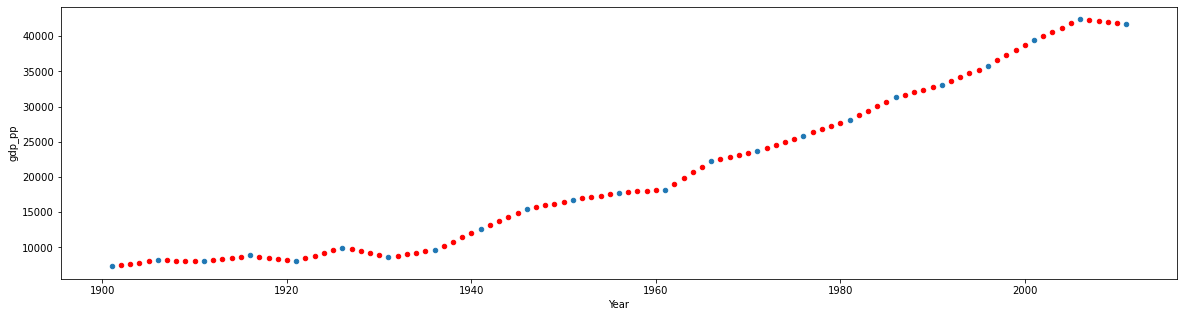

In [392]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 5))
df_gdp[(df_gdp["kind"] == "real") & (df_gdp["Country"] == "United States")].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax)
df_gdp[(df_gdp["kind"] == "estimated") & (df_gdp["Country"] == "United States")].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax, color="red")

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

In [393]:
df_gdp[df_gdp["kind"] == "real"].reset_index(drop=True).head(5)

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0,real
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0,real
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0,real
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.4,3.094,1926.0,real


In [394]:
df_gdp["Year"] = df_gdp["Year"].astype(int)
df_gdp["gdp_pp"] = df_gdp["gdp_pp"].astype(float)

In [395]:
import plotly.express as px

# Importando o dataset padrão data.gapminder()
df = px.data.gapminder()

# Transformando as colunas Country e Iso_Alpha em dicionario
# Essa informação será usada para plotagem dos dados nodf que uso
dict_iso_alpha = df.set_index("country").to_dict()["iso_alpha"]
dict_iso_alpha

{'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'Angola': 'AGO',
 'Argentina': 'ARG',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Belgium': 'BEL',
 'Benin': 'BEN',
 'Bolivia': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Comoros': 'COM',
 'Congo, Dem. Rep.': 'COD',
 'Congo, Rep.': 'COG',
 'Costa Rica': 'CRI',
 "Cote d'Ivoire": 'CIV',
 'Croatia': 'HRV',
 'Cuba': 'CUB',
 'Czech Republic': 'CZE',
 'Denmark': 'DNK',
 'Djibouti': 'DJI',
 'Dominican Republic': 'DOM',
 'Ecuador': 'ECU',
 'Egypt': 'EGY',
 'El Salvador': 'SLV',
 'Equatorial Guinea': 'GNQ',
 'Eritrea': 'ERI',
 'Ethiopia': 'ETH',
 'Finland': 'FIN',
 'France': 'FRA',
 'Gabon': 'GAB',
 'Gambia': 'GMB',
 'Germany': 'DEU',


In [397]:
# Técnica Compreensão em Dicionários:
dict_num = {j: i for i, j in enumerate(df_gdp["Country"].unique())}
dict_num

{'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Andorra': 3,
 'Angola': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Australia': 8,
 'Austria': 9,
 'Azerbaijan': 10,
 'Bahamas': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belarus': 15,
 'Belgium': 16,
 'Belize': 17,
 'Benin': 18,
 'Bhutan': 19,
 'Bolivia': 20,
 'Bosnia and Herzegovina': 21,
 'Botswana': 22,
 'Brazil': 23,
 'Brunei': 24,
 'Bulgaria': 25,
 'Burkina Faso': 26,
 'Burundi': 27,
 'Cambodia': 28,
 'Cameroon': 29,
 'Canada': 30,
 'Cape Verde': 31,
 'Chad': 32,
 'Chile': 33,
 'China': 34,
 'Colombia': 35,
 'Comoros': 36,
 'Congo, Rep.': 37,
 'Costa Rica': 38,
 "Cote d'Ivoire": 39,
 'Croatia': 40,
 'Cuba': 41,
 'Cyprus': 42,
 'Czech Rep.': 43,
 'Denmark': 44,
 'Djibouti': 45,
 'Dominica': 46,
 'Ecuador': 47,
 'Egypt': 48,
 'El Salvador': 49,
 'Equatorial Guinea': 50,
 'Eritrea': 51,
 'Estonia': 52,
 'Ethiopia': 53,
 'Fiji': 54,
 'Finland': 55,
 'France': 56,
 'Gabon': 57,
 'Gambia': 58,
 'Geor

In [398]:
df_gdp["iso_alpha"] = df_gdp["Country"].map(dict_iso_alpha)
df_gdp["iso_num"] = df_gdp["Country"].map(dict_num)

In [ ]:
fig = px.choropleth(df_gdp[df_gdp["kind"] == "real"].reset_index(drop=True), locations="iso_alpha", color="gdp_pp", hover_name="Country", animation_frame="Year")

fig.update_layout(height=600)
fig.show()

- Há uma relação entre níveis de obesidade e gdp per capita?

In [412]:
df_obesity["country-year"] = df_obesity["Country"] + "-" + df_obesity.reset_index()["Year"].apply(lambda x: str(int(x))).values
dict_obesity_year = df_obesity.set_index("country-year").to_dict()["Obesity"]

In [413]:
df_gdp["country-year"] = df_gdp["Country"] + "-" + df_gdp["Year"].apply(lambda x: str(x)).values
df_gdp["Obesity"] = df_gdp["country-year"].map(dict_obesity_year)

In [414]:
df_gdp.dropna(inplace=True)

In [415]:
df_gdp_clean = df_gdp.dropna()

In [416]:
countries = df_gdp_clean["Country"].unique()

In [417]:
corr_list = []
for country in countries:
    corr_list += [df_gdp_clean[df_gdp_clean["Country"] == country][["Obesity", "gdp_pp"]].corr().iloc[0, 1]]

df_corr = pd.Series(corr_list, index=countries)

In [418]:
df_corr.mean()

0.5156020945367672

In [419]:
df_corr.std()

0.6523066623226486

<AxesSubplot:>

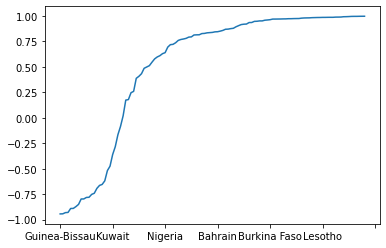

In [420]:
df_corr.sort_values().plot()

<AxesSubplot:xlabel='Year'>

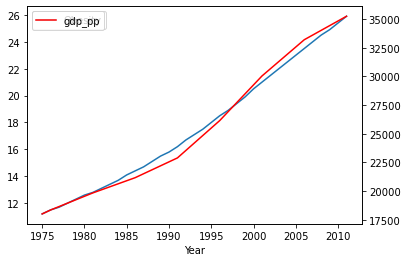

In [421]:
country = "Australia"
fig, ax = plt.subplots()
df_gdp_clean[df_gdp_clean["Country"] == country][["Obesity"]].plot(ax=ax)
ax2 = ax.twinx()
df_gdp_clean[df_gdp_clean["Country"] == country][["gdp_pp"]].plot(ax=ax2, color="red")

In [422]:
df_gdp_clean

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year,Obesity
Year,,,,,,,,,,,
1975,Afghanistan,"Middle East, North Africa, and Greater Arabia",1975,847.692,18.498,1976.0,estimated,AFG,0,Afghanistan-1975,0.8
1976,Afghanistan,"Middle East, North Africa, and Greater Arabia",1976,866.190,6.134,1981.0,real,AFG,0,Afghanistan-1976,0.8
1977,Afghanistan,"Middle East, North Africa, and Greater Arabia",1977,872.324,6.134,1981.0,estimated,AFG,0,Afghanistan-1977,0.9
1978,Afghanistan,"Middle East, North Africa, and Greater Arabia",1978,878.458,6.134,1981.0,estimated,AFG,0,Afghanistan-1978,0.9
1979,Afghanistan,"Middle East, North Africa, and Greater Arabia",1979,884.592,6.134,1981.0,estimated,AFG,0,Afghanistan-1979,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2006,Zimbabwe,Sub-Saharan Africa,2006,520.170,1.232,2011.0,real,ZWE,192,Zimbabwe-2006,20.9
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2007,21.3
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2008,21.7


In [423]:
df_gdp_clean.reset_index(drop=True).groupby("Year")[["Obesity", "gdp_pp"]].mean().corr().iloc[0, 1]

0.9693775432125091

## Visualizando dados com Matplotlib - Criando plots com Matplotlib

# Capítulo 3.1.1: Introdução ao Matplotlib

## Imports

In [547]:
import numpy as np
import pandas as pd
%matplotlib inline

## Os dados

Existem alguns arquivos csv de dados falsos que você pode ler como dados:

In [549]:
caminho = (r'C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\_Cursos\ASIMOV - Python para DS e ML\3. Visualizando dados com Matplotlib\Apostilas\Visualização de dados incorporada do Pandas')

df1 = pd.read_csv(caminho + '\df1',index_col=0)
df2 = pd.read_csv(caminho + '\df2')

## Folhas de estilo

Matplotlib tem [folhas de estilo](http://matplotlib.org/gallery.html#style_sheets) que você pode usar para tornar seus plots mais agradáveis. Essas folhas de estilo incluem plot_bmh, plot_fivethirtyeight, plot_ggplot e muito mais. Eles basicamente criam um conjunto de regras de estilo que seus plots seguirão. Eu recomendo usá-los dado que eles farão seus plots terem uma aparência muito mais profissional. Você pode até mesmo criar o seu próprio caso você deseja que os gráficos de sua empresa tenham todos o mesmo aspecto (é um pouco tedioso para criar).

Aqui é como usá-los.

**Antes de plt.style.use (), seus plots são assim:**

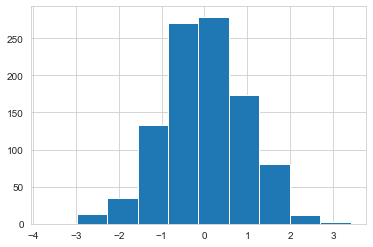

In [551]:
df1['A'].hist();

Aplicando o estilo:

In [552]:
import matplotlib.pyplot as plt
plt.style.use('ggplot');

Agora seus plot são assim:

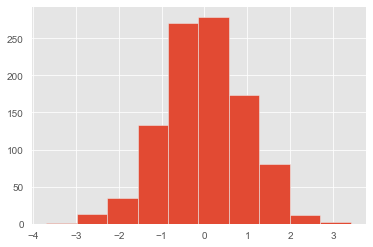

In [553]:
df1['A'].hist();

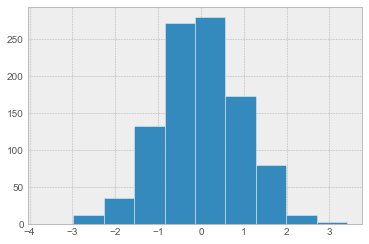

In [554]:
plt.style.use('bmh')
df1['A'].hist();

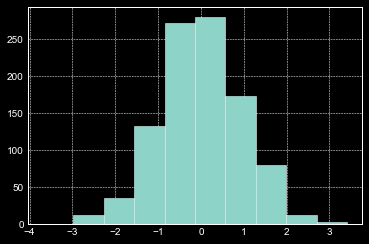

In [555]:
plt.style.use('dark_background')
df1['A'].hist();

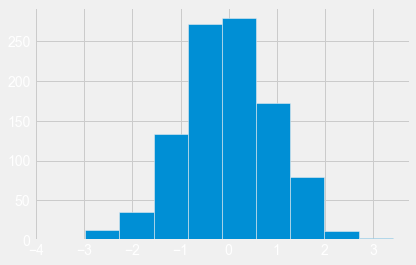

In [556]:
plt.style.use('fivethirtyeight')
df1['A'].hist();

In [557]:
plt.style.use('ggplot')

# Tipos de plotagem

Existem vários tipos de plots incorporados aos pandas, a maioria deles plots estatísticos por natureza:

* df.plot.area
* df.plot.barh
* df.plot.density
* df.plot.hist
* df.plot.line
* df.plot.scatter
* df.plot.bar
* df.plot.box
* df.plot.hexbin
* df.plot.kde
* df.plot.pie

Você também pode simplesmente chamar df.plot (kind = 'hist') ou substituir esse argumento por qualquer um dos termos-chave mostrados na lista acima (por exemplo, 'caixa', 'barh', etc.)
___

Vamos começar por eles!

## Área

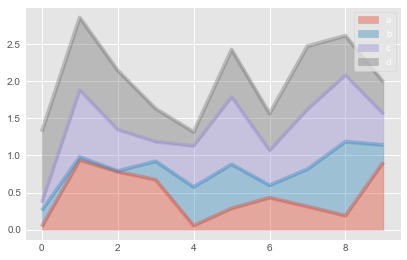

In [559]:
df2.plot.area(alpha=0.4);

## Barplots

In [560]:
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


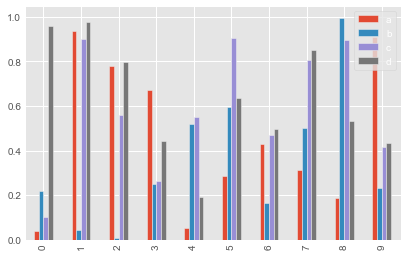

In [561]:
df2.plot.bar();

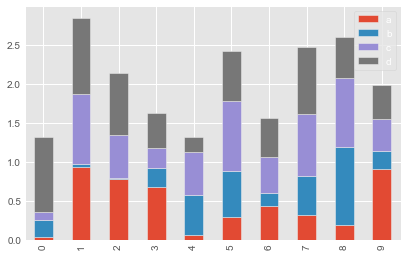

In [562]:
df2.plot.bar(stacked=True);

## Histogramas

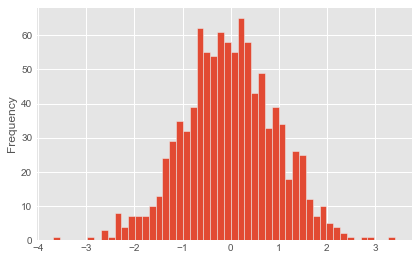

In [563]:
df1['A'].plot.hist(bins=50);

## Line Plots

In [ ]:
df1.plot.line(x=df1.index,y='B',figsize=(12,3),lw=1)

## Scatter Plots

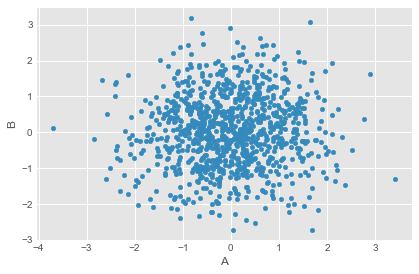

In [566]:
df1.plot.scatter(x='A',y='B');

Você pode usar c para colorir com base em outro valor de coluna.
Use o cmap para indicar o mapa de cores a ser usado.
Para todos os colormaps, confira: http://matplotlib.org/users/colormaps.html

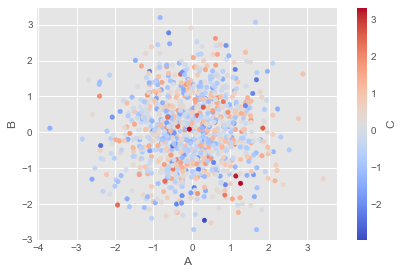

In [567]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm');

Ou use s para indicar o tamanho com base em outra coluna. s parâmetro precisa ser uma matriz, não apenas o nome de uma coluna:

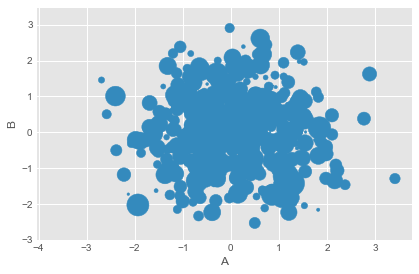

In [568]:
df1.plot.scatter(x='A',y='B',s=df1['C']*200);

## BoxPlots

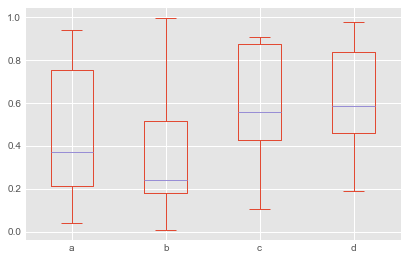

In [569]:
df2.plot.box();

## Hexagonal Bin Lote

Útil para Dados Bivariados, alternativa ao Scatterplot:

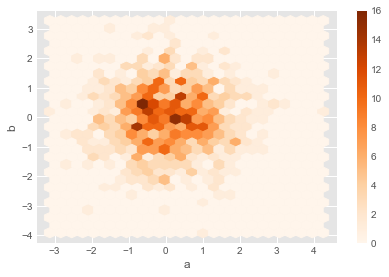

In [570]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges');

## Plot de Estimação de densidade de Kernel (Kernel Density Estimation - KDE)

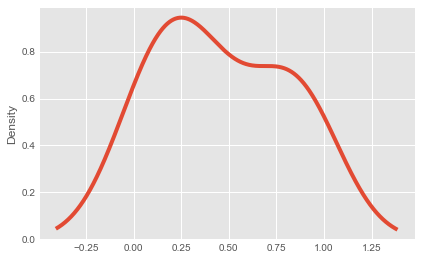

In [571]:
df2['a'].plot.kde();

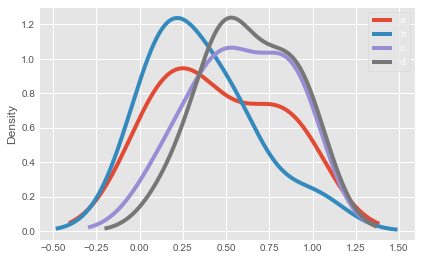

In [572]:
df2.plot.density();

# Capítulo 3.1.2: Funções Básicas de Plot

In [428]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [425]:
x = np.linspace(0, 5, 11)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [426]:
y = x ** 2

Text(0.5, 1.0, 'Título')

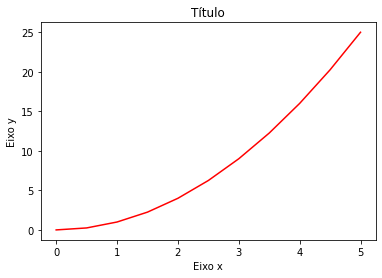

In [431]:
plt.plot(x, y, "red")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")
plt.title("Título")

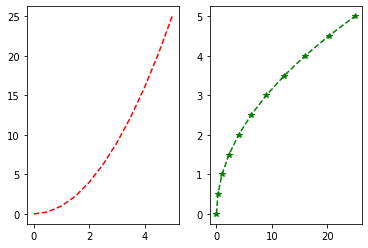

In [434]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')

plt.subplot(1, 2, 2)
plt.plot(y, x, 'g*--')

# Capítulo 3.1.3: Orientação à Objetos no Matplotlib

Text(0.5, 1.0, 'Título')

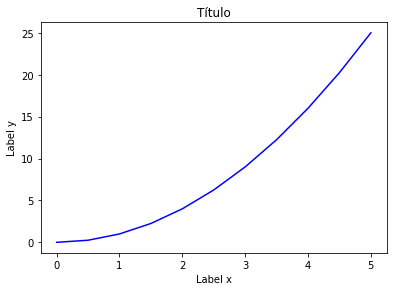

In [439]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # esquerda, inferior, largura, altura
axes.plot(x, y, 'blue')
axes.set_xlabel("Label x")
axes.set_ylabel("Label y")
axes.set_title("Título")

Text(0.5, 1.0, 'Título 2')

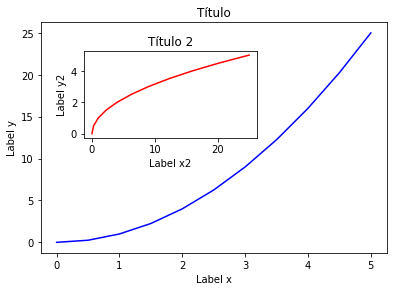

In [442]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # esquerda, inferior, largura, altura
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # esquerda, inferior, largura, altura

axes.plot(x, y, 'blue')
axes.set_xlabel("Label x")
axes.set_ylabel("Label y")
axes.set_title("Título")

axes2.plot(y, x, 'red')
axes2.set_xlabel("Label x2")
axes2.set_ylabel("Label y2")
axes2.set_title("Título 2")

# Capítulo 3.1.4: Subplots()

In [444]:
(1, 2) # tupla

(1, 2)

In [446]:
a, b = (1, 2)

In [447]:
a # desempacotou a tupla

1

In [448]:
b # desempacotou a tupla

2

Text(0.5, 1.0, 'Título do nosso subplot')

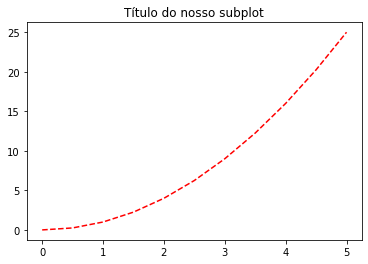

In [449]:
fig, ax = plt.subplots()

ax.plot(x, y, 'r--')
ax.set_title("Título do nosso subplot")

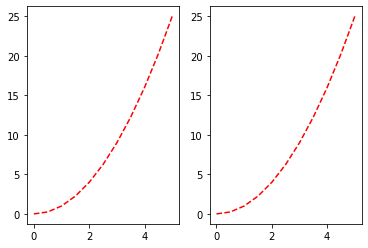

In [451]:
fig, ax = plt.subplots(nrows=1, ncols=2)

for axis in ax:
    axis.plot(x, y, 'r--')

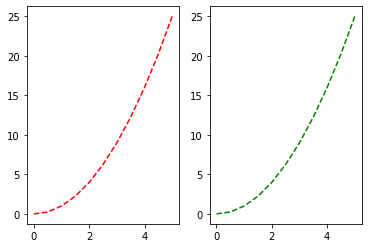

In [452]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(x, y, 'r--')
ax[1].plot(x, y, 'g--')

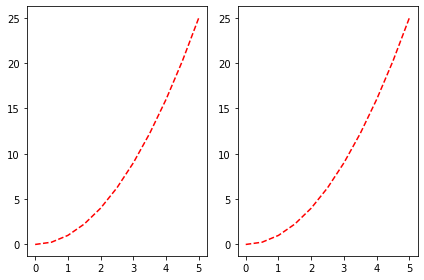

In [453]:
# Função tight_layout() - Ajuste de tamanho do gráfico
fig, ax = plt.subplots(nrows=1, ncols=2)

for axis in ax:
    axis.plot(x, y, 'r--')

plt.tight_layout()

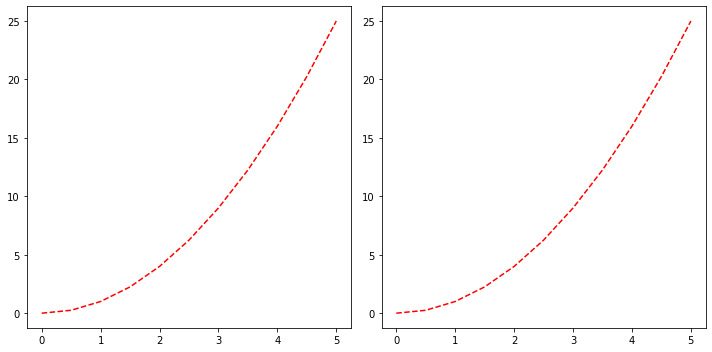

In [456]:
# Função figsize() - Ajuste de tamanho do gráfico
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for axis in ax:
    axis.plot(x, y, 'r--')

plt.tight_layout()

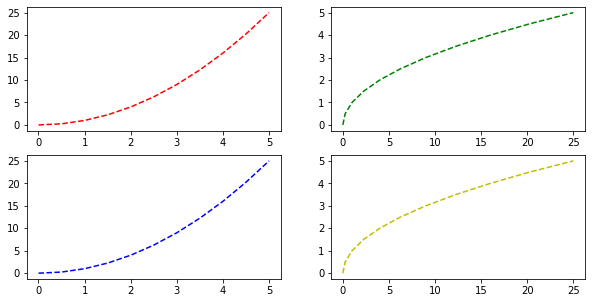

In [459]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

ax[0][0].plot(x, y, 'r--')
ax[0][1].plot(y, x, 'g--')
ax[1][0].plot(x, y, 'b--')
ax[1][1].plot(y, x, 'y--')

## Salvando figuras
A Matplotlib pode gerar saída de alta qualidade em vários formatos, incluindo PNG, JPG, EPS, SVG, PGF e PDF.

Para salvar uma figura em um arquivo, podemos usar o método `savefig` da classe` Figure`:

In [ ]:
fig.savefig("filename.png")

Aqui também podemos opcionalmente especificar o DPI e escolher entre diferentes formatos de saída:

In [ ]:
fig.savefig("filename.png", dpi=200)

# Capítulo 3.1.5: Customização

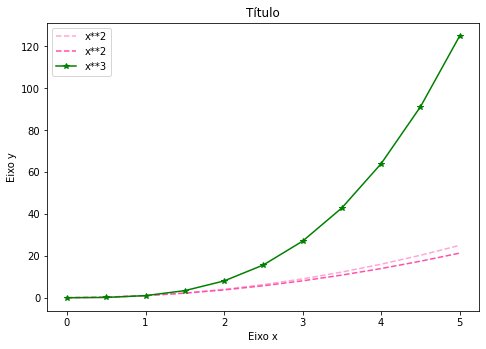

In [472]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, '--', label="x**2", color="#FF50AB", alpha=0.5)
ax.plot(x, x**1.9, '--', label="x**2", color="#FF50AB", alpha=1)
ax.plot(x, x**3, "g*-", label="x**3")

ax.set_title("Título")
ax.set_xlabel("Eixo x")
ax.set_ylabel("Eixo y");

ax.legend() # parâmetro loc para escolher posição

### Linha e estilos de marcadores

Para alterar a largura da linha, podemos usar o argumento de palavras-chave `linewidth` ou` lw`. O estilo de linha pode ser selecionado usando os argumentos de palavras-chave `linestyle` ou` ls`:

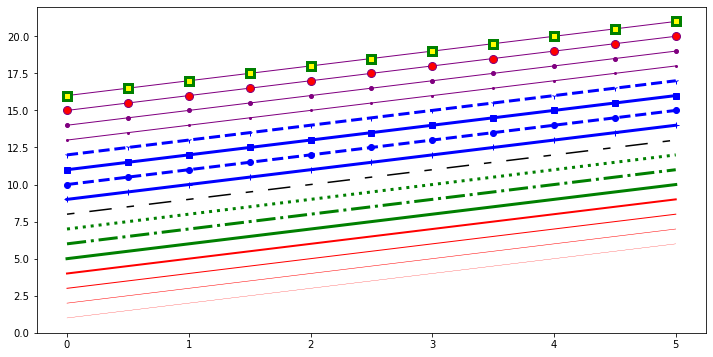

In [474]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# Possiveis estilos de linha: ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# Traços estilizados
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # Formato: comprimento da linha, comprimento do espaço, ...

# possíveis símbolos de marcador: marcador = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# tamanho e cor do marcador
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

Text(0.5, 1.0, 'Intervalo de Eixos Padrão')

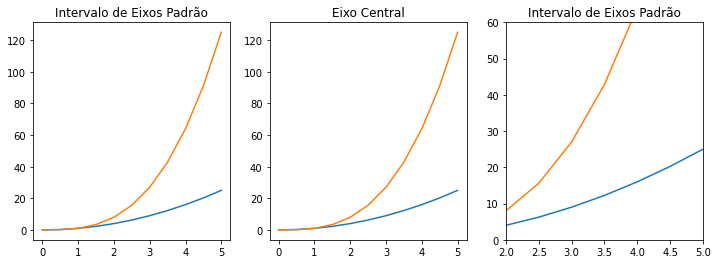

In [478]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

axes[0].plot(x, x**2)
axes[0].plot(x, x**3)
axes[0].set_title("Intervalo de Eixos Padrão")

axes[1].plot(x, x**2)
axes[1].plot(x, x**3)
axes[1].axis("Tight") # Eixo Comprimido
axes[1].set_title("Eixo Central")

axes[2].plot(x, x**2)
axes[2].plot(x, x**3)
axes[2].set_ylim([0,60]) # zoom no gráfico estabelecendo o intervalo a ser observado
axes[2].set_xlim([2,5]) # zoom no gráfico estabelecendo o intervalo a ser observado
axes[2].set_title("Intervalo de Eixos Padrão")

# Capítulo 3.1.6: Plots Especiais

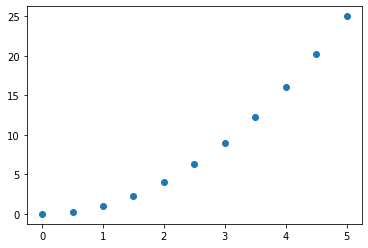

In [480]:
plt.scatter(x, y);

In [487]:
from random import sample

In [488]:
data = sample(range(1, 1000), 100)

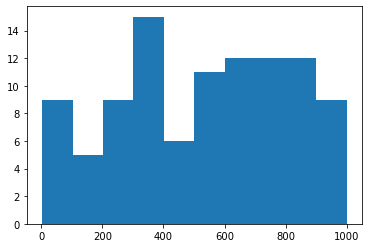

In [490]:
plt.hist(data);

In [491]:
# Criar 3 listas com desvio padrão diferente com 100 valores nesse intervalo
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

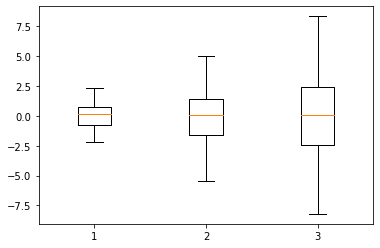

In [493]:
plt.boxplot(data);

## Visualizando dados com Matplotlib - Criando Gráficos Estatísticos com Seaborn

# Capítulo 3.2.2: Plots de Distribuição

In [494]:
import seaborn as sns
%matplotlib inline

In [496]:
# Dataset de gorjetas
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


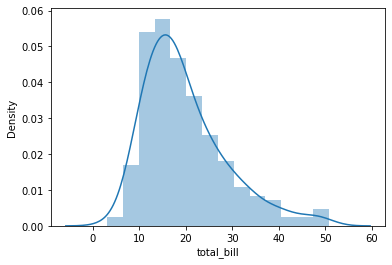

In [498]:
sns.distplot(tips['total_bill']);

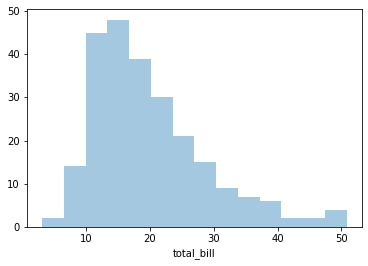

In [499]:
# Remover a curva de distribuição
sns.distplot(tips['total_bill'], kde=False);

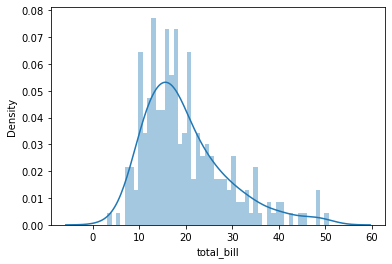

In [500]:
# Divisão de barras
sns.distplot(tips['total_bill'], bins=50);

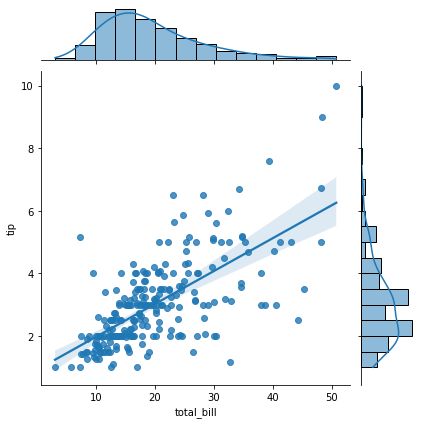

In [504]:
# joinplot() - Analisar 2 variáveis ao mesmo tempo
# kind='reg' - Regressão entre as variáveis
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

# Corrleção positiva em total bill e tips.
# Quanto maior é a conta, maior a gorjeta

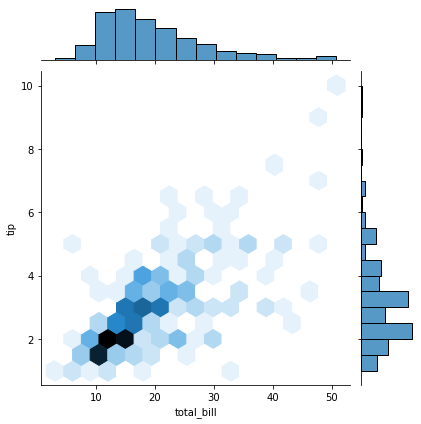

In [505]:
# kind='hex' - Escurece na região de maior volume de dados
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

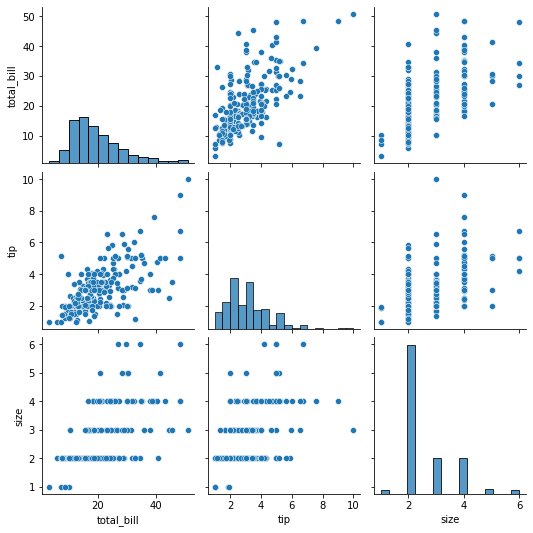

In [506]:
# Matriz de correlação entre as variáveis
sns.pairplot(tips)

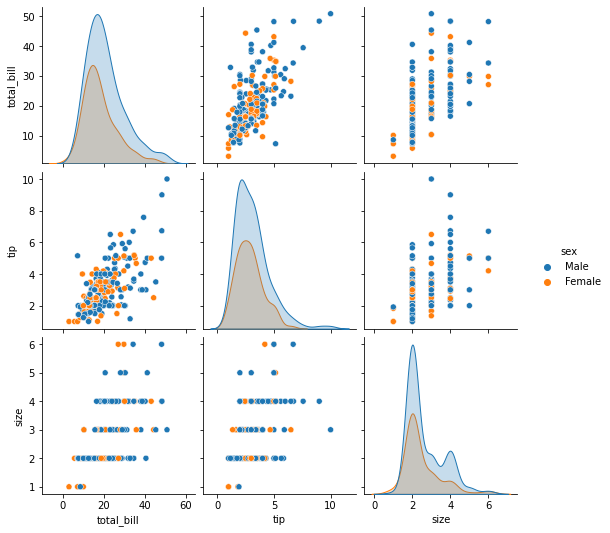

In [507]:
# Matriz de correlação entre as variáveis
# hue='sex' = Segregação dos dados para uma variável categórica
sns.pairplot(tips, hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

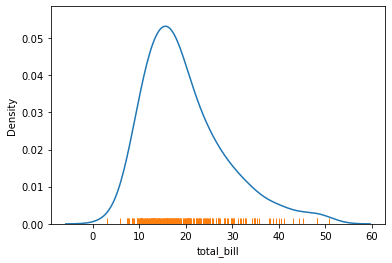

In [508]:
sns.kdeplot(tips['total_bill']) # Faz uma estimativa sobre cada ponto do gráfico
sns.rugplot(tips['total_bill']) # Traços nas aparições dos pontos - ver concentração dos dados

# Capítulo 3.2.3: Plots Categóricos

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

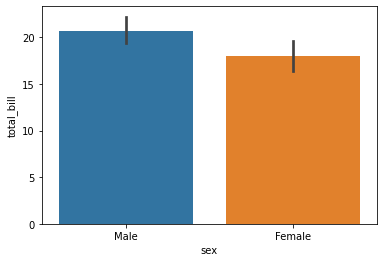

In [509]:
sns.barplot(x='sex', y='total_bill', data=tips)

In [510]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

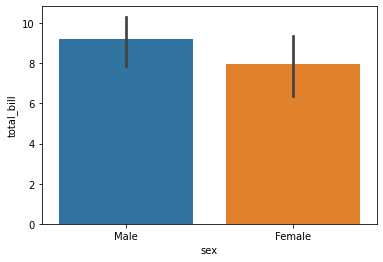

In [511]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

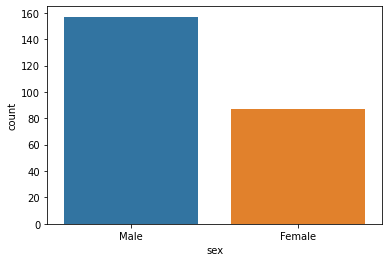

In [512]:
sns.countplot(x='sex', data=tips)

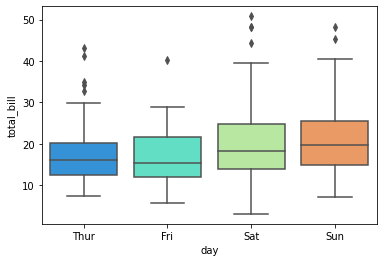

In [515]:
# Gráfico boxplot
sns.boxplot(x='day', y='total_bill', data=tips, palette='rainbow');

# Linha horizontal indica a mediana
# Pontos acima são outliers
# 4 divisões: 25%, 50%, 75% e 100% dos dados

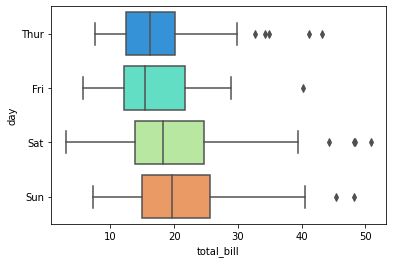

In [517]:
# Gráfico boxplot Horizontal
sns.boxplot(y='day', x='total_bill', data=tips, palette='rainbow', orient='h');

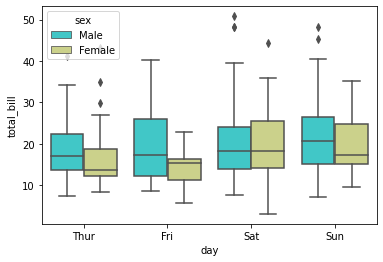

In [518]:
# Gráfico boxplot - Parâmetro Hue
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips, palette='rainbow');

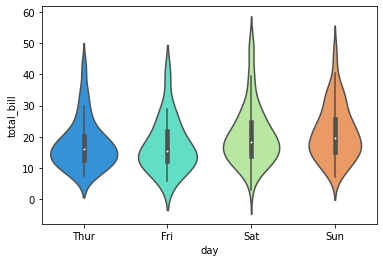

In [519]:
# Gráfico Violinplot
sns.violinplot(x='day', y='total_bill', data=tips, palette='rainbow');

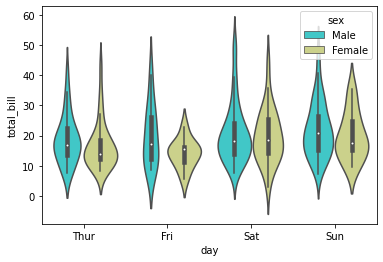

In [520]:
# Gráfico Violinplot - Parâmetro Hue
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, palette='rainbow');

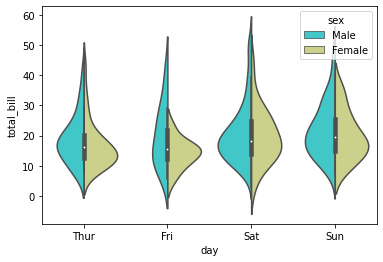

In [521]:
# Gráfico Violinplot - Parâmetro Hue Espelhado
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, palette='rainbow', split=True);

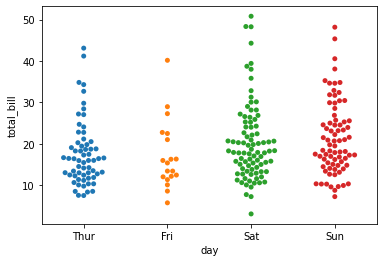

In [522]:
# Gráfico Swarmplot
# Mostra a concentração de valroes agrupados de maneira real
sns.swarmplot(x='day', y='total_bill', data=tips);

# Capítulo 3.2.4: Plots de Regressão

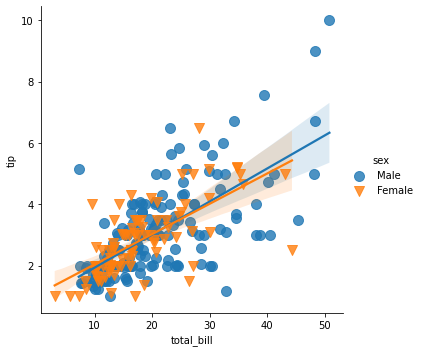

In [527]:
# Linear Model Plot - LMPLOT
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'], scatter_kws={'s': 100})

# Temos uma relação linear entre homens e mulheres deixando mais gorjeta
# scatter_kws = Tamanho das bolinhas

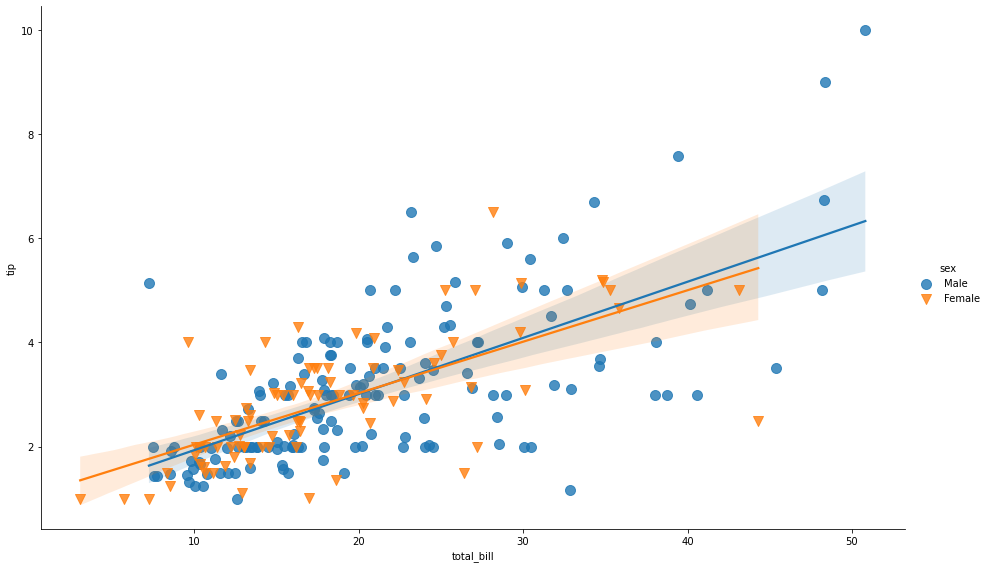

In [531]:
# Linear Model Plot - Alterar tamanho do gráfico
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'], scatter_kws={'s': 100}, aspect=1.6, size=8);

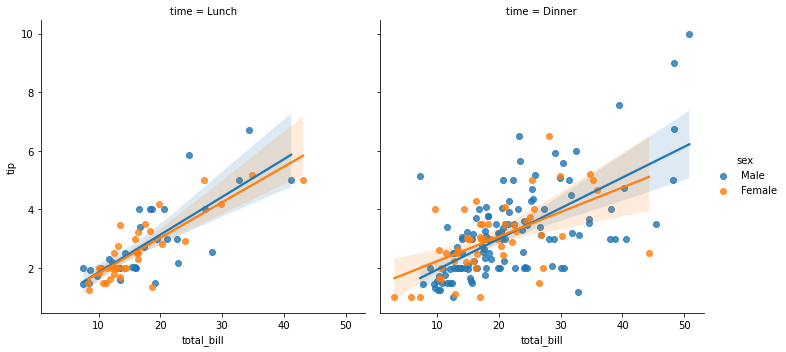

In [528]:
# Linear Model Plot - LMPLOT
# Multiplas Regressões em função do time
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='time');

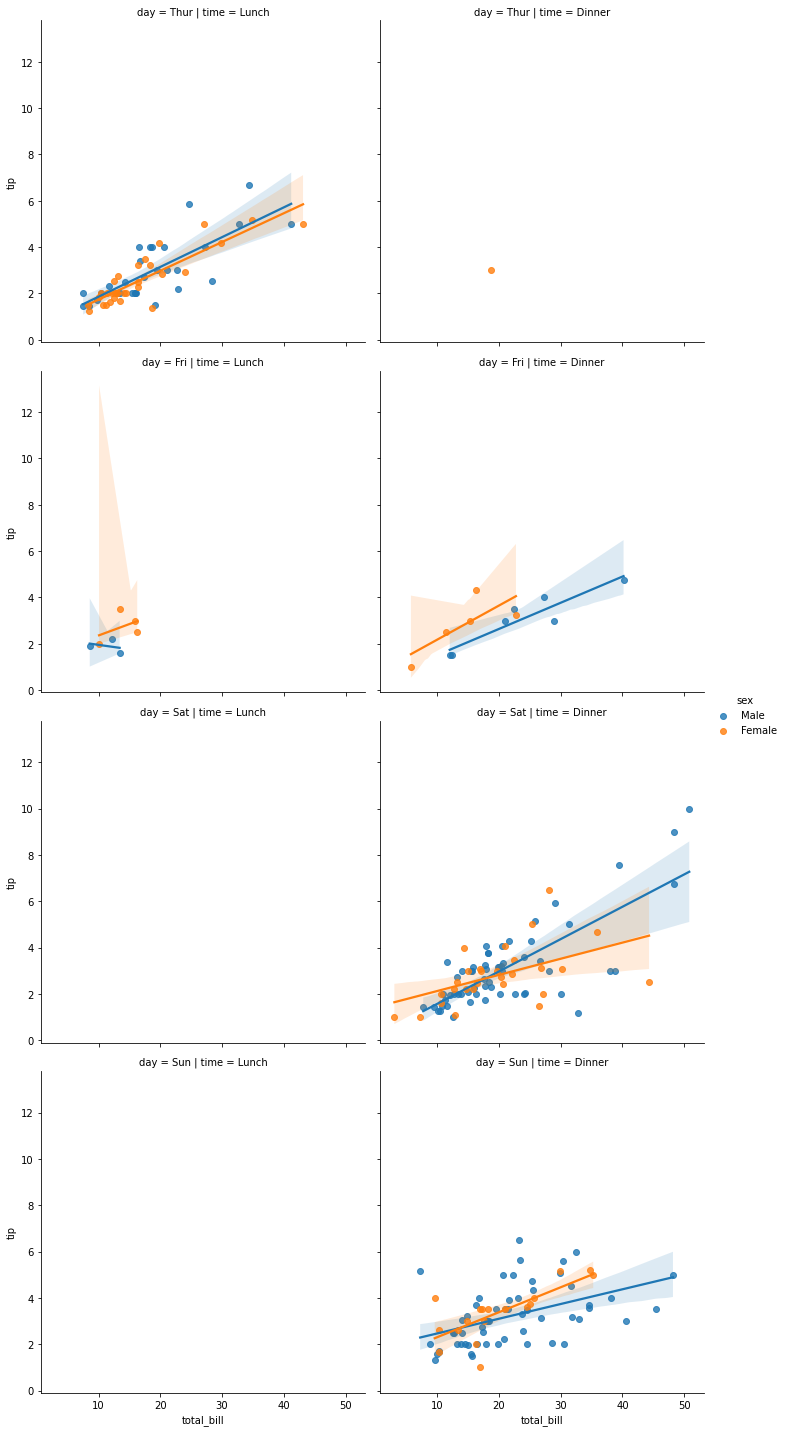

In [529]:
# Linear Model Plot - LMPLOT
# Multiplas Regressões em função do time
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='time', row='day');

# Sábado e domingo está fechado para almoço
# Sábado e domingo as relações lineares não se preservam tanto

# Capítulo 3.2.5: Plots Matriciais

In [ ]:
# Dataset voos de uma companhia aérea
flights = sns.load_dataset('flights')

In [ ]:
# Reorganizando os dados
df_flights_matrix = flights.pivot_table(index='year', columns='month', values='passengers')

In [ ]:
# Mapa de Calor
# Uso quando se tem 2 variáveis categóricas e quer ver uma terceira variável com dados contínuos
fig, ax = plt.subplots(figsize= 20, 12)
sns.heatmap(df_flights_matrix, ax=ax, annot=True, fmt='.0f', linewidths=1, cmap='magma')

# annot - Escreve o número em cada uma das caixinhas
# fmt - Formatação com 0 casas no formato float
# linewidths - Espessura da linha de divisão
# cmap - Paleta de cores

In [ ]:
# Clustermap
# Reorganiza meses e índices de forma que encontre correlações entre os dados
sns.clustermap(df_flights_matrix)

# Capítulo 3.2.6: Estilização

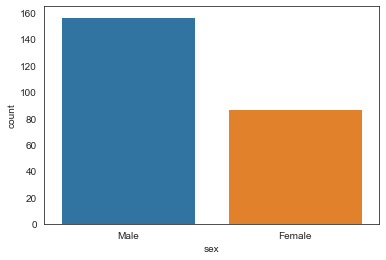

In [538]:
sns.set_style('white')
sns.countplot(x='sex', data=tips);

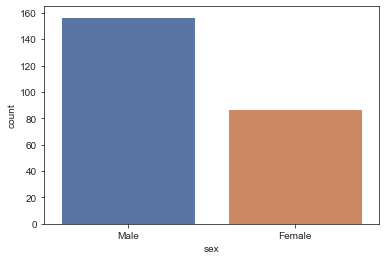

In [540]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips, palette='deep');

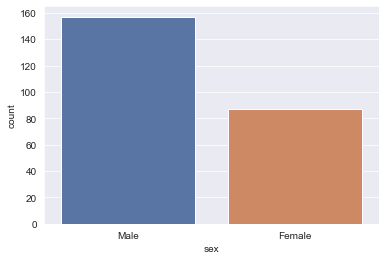

In [541]:
sns.set_style('darkgrid')
sns.countplot(x='sex', data=tips, palette='deep');

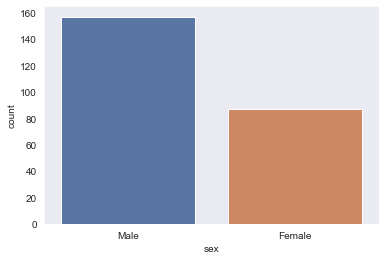

In [542]:
sns.set_style('dark')
sns.countplot(x='sex', data=tips, palette='deep');

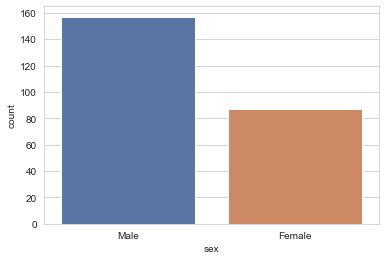

In [543]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips, palette='deep');

# Exercício de visualização de dados Pandas

Este é apenas um exercício rápido para você rever os vários gráficos que mostramos anteriormente. Use ** df3 ** para replicar os seguintes gráficos.

In [574]:
import pandas as pd
import matplotlib.pyplot as plt
df3 = pd.read_csv(caminho + '\df3')
%matplotlib inline

In [575]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       500 non-null    float64
 1   b       500 non-null    float64
 2   c       500 non-null    float64
 3   d       500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [576]:
df3.head()

,a,b,c,d
0,0.336272,0.325011,0.001020,0.401402
1,0.980265,0.831835,0.772288,0.076485
2,0.480387,0.686839,0.000575,0.746758
3,0.502106,0.305142,0.768608,0.654685
4,0.856602,0.171448,0.157971,0.321231


**Recrie este gráfico de dispersão de b vs a. Observe a cor e o tamanho dos pontos. Observe também o tamanho da figura. Veja se você consegue descobrir como alongá-lo de forma semelhante. Se precisar, volte algumas seções ...**

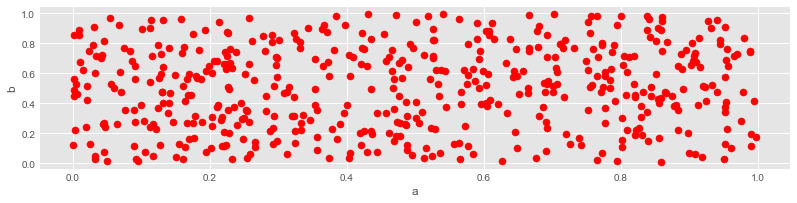

In [577]:
df3.plot.scatter(x='a',y='b',c='red',s=50,figsize=(12,3));

**Crie um histograma da coluna 'a'.**

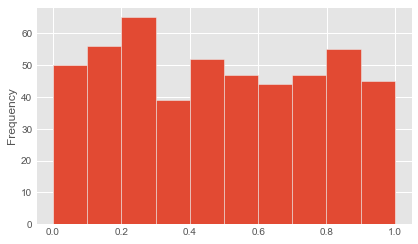

In [579]:
df3['a'].plot.hist();

**Estes plots estão ok, mas elas não parecem muito profissionais. Use folhas de estilo para definir o estilo em 'ggplot' e refazer o histograma de cima. Veja também como adicionar mais barras.**

In [580]:
plt.style.use('ggplot')

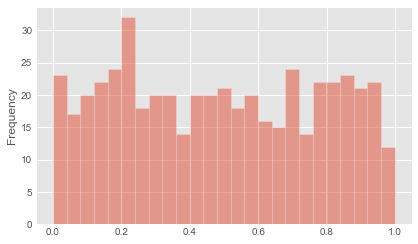

In [581]:
df3['a'].plot.hist(alpha=0.5,bins=25);

**Crie um boxplot comparando as colunas a e b.**

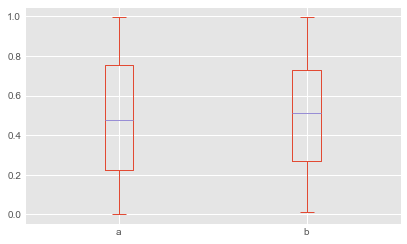

In [582]:
df3[['a','b']].plot.box();

**Criar um plot "kde" da coluna 'd'**

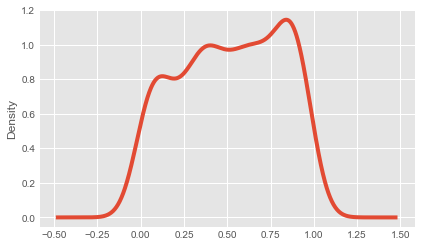

In [583]:
df3['d'].plot.kde();

**Descubra como aumentar a largura de linha e fazer o linestyle pontilhado.**

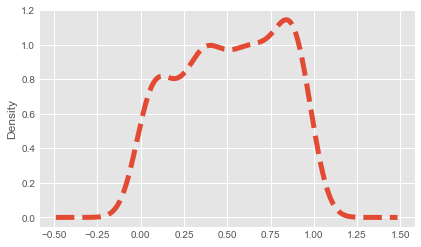

In [584]:
df3['d'].plot.density(lw=5,ls='--');

**Crie um gráfico de área de todas as colunas para apenas as linhas até 30. (sugestão: use .ix).**

In [ ]:
df3.ix[0:30].plot.area(alpha=0.4);

## Desafio bonus!

**Observe como a legenda em nossa figura anterior sobrepôs alguns dos diagramas reais. Você pode descobrir como exibir a legenda fora do enredo, conforme mostrado abaixo?**

**Tente pesquisar o Google para obter um bom link stackoverflow sobre este tópico. Se você não consegue encontrá-lo sozinho - [use este para uma dica.](Http://stackoverflow.com/questions/23556153/how-to-put-legend-outside-the-plot-with-pandas )**

In [ ]:
f = plt.figure()
df3.ix[0:30].plot.area(alpha=0.4,ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()